In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[ ]:


from numpy import exp, linspace, random
from scipy.optimize import curve_fit

from scipy import integrate, optimize
import datetime as dt
from matplotlib import gridspec
import matplotlib.dates as mdates
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.interpolate import interp1d
import math
import pandas as pd






In [2]:
co= pd.read_csv('Kenya_covidata.csv')

data_infected =co.Total_Infected
 
data_time   = co.Days
print(len(co.Days))

data_recovered  = co.Total_Recovered

data_dead  = co.Total_Deaths

data_active = co.Active_Cases



print((data_time ))

'''
ntests = [21702, 46784, 82946, 85058, 87698, 94507, 97340, 98436, 100683, 102956, 108666, 112169, 115336, 118701, 121956, 
          124474, 130498, 136361, 140012, 146537, 155314, 158404, 162478, 167417, 169836, 173355, 176059, 180206, 185035, 
          191394, 196508, 206584, 207987, 214966, 216242, 221234, 225495, 228674, 238920, 241394, 249306, 256060, 263187, 
          264974, 268171]
#print(len(ntests))
'''





720
0       0.0
1       2.0
2       3.0
3       5.0
4      11.0
       ... 
715     NaN
716     NaN
717     NaN
718     NaN
719     NaN
Name: Days, Length: 720, dtype: float64


'\nntests = [21702, 46784, 82946, 85058, 87698, 94507, 97340, 98436, 100683, 102956, 108666, 112169, 115336, 118701, 121956, \n          124474, 130498, 136361, 140012, 146537, 155314, 158404, 162478, 167417, 169836, 173355, 176059, 180206, 185035, \n          191394, 196508, 206584, 207987, 214966, 216242, 221234, 225495, 228674, 238920, 241394, 249306, 256060, 263187, \n          264974, 268171]\n#print(len(ntests))\n'

In [3]:
dados=pd.read_csv('Kenya_covidata.csv')
dados

,Date,Days,Tests_per_day,Cumulative_Tests,New_cases,Total_Infected,Daily_Recovered,Total_Recovered,Daily_Deaths,Total_Deaths,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,12-Mar,0.0,NaN,NaN,1.0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15-Mar,2.0,NaN,NaN,4.0,5.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16-Mar,3.0,NaN,NaN,2.0,7.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18/03,5.0,NaN,NaN,4.0,11.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23-Mar,11.0,NaN,NaN,4.0,15.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
 def rzero( t, par): 
    alpha   = par[0]
    beta    = par[1]
    delta   = par[2]
    gamma   = par[3]
    epsilon = par[4]
    zeta    = par[5]
    lamda   = par[6]
    eta     = par[7]
    rho     = par[8]
    theta   = par[9]
    mu      = par[10]
    kappa   = par[11]
    nu      = par[12]
    chi     = par[13]
    sigma   = par[14]
    tau_a   = par[15]
    tau     = par[16]
    alpha_p = par[17]
    phi     = par[18]
    # Parameters
    r1=epsilon+zeta+lamda
    r2=eta+rho
    r3=theta+mu+kappa
    r4=nu+chi
    r5=sigma+tau
    # Initial R0
    R0_initial=alpha/r1+beta*epsilon/(r1*r2)+gamma*zeta/(r1*r3)+delta*eta*epsilon/(r1*r2*r4)+ delta*zeta*theta/(r1*r3*r4)+r5
    R0 = R0_initial;
    # 'Control' binary variables to compute the new R0 every time a policy has
    # changed the parameters
    plottato = 0
    plottato1 = 0
    plottato2 = 0
    plottato3 = 0
    plottato4 = 0
    plottato5 =0
    plottato6 =0
    plottato7 =0
    plottato8 =0
    plottato9 =0
    plottato10 =0
    plottato11 = 0      
    plottatoA= 0
    plottatoB = 0
    plottatoC = 0
    plottatoD = 0
    plottatoE = 0
    plottatoF =0
    plottatoG =0
    plottatoH =0
    plottatoI =0
    plottatoJ =0
    plottatoK =0
    plottatoL = 0
    plottatoM=0
    plottatoN=0
    plottatoO=0
    plottatoP=0
    plottatoQ=0
    plottatoR=0
    plottatoS=0  
    plottatoT=0
    plottatoU=0
    plottatoV=0
    plottatoW=0
    plottatoX=0
    plottatoY=0 
    plottatoZ=0
    plottatoa=0   
    plottatob=0
    plottatoc=0
    plottatod=0
    plottatoe=0
    plottatof=0
    plottatog=0
    plottatoh=0
    plottatoi=0
    plottatoj=0
    plottatok=0  
    plottatol=0
    plottatom=0
    plottaton=0
    plottatoo=0
    plottatop=0
    plottatoq=0 
    plottator=0
    plottatos=0
    plottatot=0  
    plottatou=0
    plottatov=0
    plottatow=0
    plottatoy=0
    plottatox=0
    plottatoz=0    
    
    
    if (t<410):
        tau_a   = 0.00
        phi     = 0.00
        alpha_p = 0.00    
    # Basic social distancing (awareness, schools closed)
    if (t >= 0 ):
        alpha= 0.6
        gamma= 0.6
        beta = 0.40  
        delta= 0.40
        
        epsilon = 0.7   # epsilon: Detection rate for ASYMPTOMATIC
        theta   = 0.7   # theta: Detection rate for ASYMPTOMATIC
        
        mu = 0.3        #mu: Worsening rate: UNDETECTED symptomatic infected develop life-threatening
        nu = 0.3        #nu: Worsening rate: DETECTED symptomatic infected develop life-threatening
        
        zeta = 0.50     #// zeta: Worsening rate: UNDETECTED asymptomatic infected becomes symptomatic
        eta  = 0.50    #  // eta: Worsening rate: DETECTED asymptomatic infected becomes symptomatic
        
        lamda =0.01
        
        rho=0.002
        kappa=0.002
        chi=0.002
        sigma=0.002
        
        tau = 0.01
        # Compute the new R0
        if (plottato == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+tau
            R0_primemisure=alpha/r1+beta*epsilon/(r1*r2)+gamma*zeta/(r1*r3)+delta*eta*epsilon/(r1*r2*r4)+delta*zeta*theta/(r1*r3*r4)+r5
            plottato = 1
            R0 = R0_primemisure
            # Screening limited to / focused on symptomatic subjects
            
    if (t>11):
        alpha   = 0.20
        beta    = 0.10
        delta   = 0.10
        gamma   = 0.20
        
        epsilon = 0.5
        theta   = 0.5
    
        
        lamda   = 0.01
        
        zeta    = 0.3
        eta     = 0.2
        
        mu      = 0.4
        nu      = 0.4
        
        rho     = 0.009
        kappa   = 0.009
        chi     = 0.009
        sigma   = 0.009
        
        tau     = 0.005
        if (plottato1 == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+tau
            R0_primemisureeps=alpha/r1+beta*epsilon/(r1*r2)+gamma*zeta/(r1*r3)+delta*eta*epsilon/(r1*r2*r4)+delta*zeta*theta/(r1*r3*r4)+r5
            plottato1 = 1
            R0 = R0_primemisureeps
       # { // Social distancing: lockdown, mild effect

    if (t>27):
        alpha=0.10   
        beta=0.05  
        gamma=0.10  
        delta=0.05 
        
        epsilon=0.1  
        theta=0.12
        
        mu = 0.20    
        nu = 0.2 
        
        zeta=0.2    
        eta=0.2 
        
        lamda=0.01
        
        rho=0.03     
        kappa=0.03   
        chi=0.03   
        sigma=0.03
        
        tau = 0.0015        
        # { // Compute the new R0
        if (plottato2 == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+tau
            R0_secondemisure=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+r5
            plottato2 = 1
            R0 = R0_secondemisure
       # { // Social distancing: lockdown, strong effect
    if (t>38):
        alpha=0.5
        beta=0.30
        gamma=0.5
        delta=0.30
        
        epsilon=0.1  
        theta=0.2
        
        mu = 0.3 
        nu = 0.2 
        
        zeta=0.7 
        eta=0.6
        
        lamda=0.03
        
        rho=0.05
        kappa=0.05
        chi=0.05
        sigma=0.05
        
        tau = 0.01
      # { // Compute the new R0
        if (plottato3 == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+tau
            R0_terzemisure=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato3 = 1
            R0 = R0_terzemisure
            
    if (t>46):
        alpha=0.2
        beta=0.1
        gamma=0.2
        delta=0.1
        
        epsilon=0.1  
        theta=0.2
        
        mu = 0.3 
        nu = 0.2 
        
        zeta=0.4 
        eta=0.3
        
        lamda=0.03
        
        rho=0.02
        kappa=0.02
        chi=0.02
        sigma=0.02
        
        tau = 0.005
      # { // Compute the new R0
        if (plottato4 == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+tau
            R0_A=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato4 = 1
            R0 = R0_A
            
            
            
    if (t>55):
        alpha=0.28
        beta=0.10
        gamma=0.28
        delta=0.10
        
        epsilon=0.3  
        theta=0.2
        
        mu = 0.3 
        nu = 0.1 
        
        zeta=0.1 
        eta=0.3
        
        lamda=0.001
        
        rho=0.1
        kappa=0.001
        chi=0.001
        sigma=0.0001
        
        tau = 0.002
      # { // Compute the new R0
        if (plottato5 == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+tau
            R0_B=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato5 = 1
            R0 = R0_B
            
            
    if (t>75):
        alpha=0.20
        beta=0.05
        gamma=0.20
        delta=0.05
        
        epsilon=0.2
        theta=0.1
        
        mu = 0.2
        nu = 0.1 
        
        zeta=0.05 
        eta=0.05
    
        lamda=0.001
        
        rho=0.02
        kappa=0.01
        chi=0.02
        sigma=0.01
        
        tau = 0.002
      # { // Compute the new R0
        if (plottato6 == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+tau
            R0_C=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato6 = 1
            R0 = R0_C
            
            
    if (t>95):
        alpha=0.15
        beta=0.02
        gamma=0.15
        delta=0.02
        
        epsilon=0.2
        theta=0.1
        
        mu = 0.2
        nu = 0.05 
        
        zeta=0.05 
        eta=0.05
    
        lamda=0.0002
        
        rho=0.003
        kappa=0.01
        chi=0.02
        sigma=0.01
        
        tau = 0.001
      # { // Compute the new R0
        if (plottato7 == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+tau
            R0_D=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato7 = 1
            R0 = R0_D
            
            
    if (t>115):
        alpha=0.001
        beta=0.001
        gamma=0.001
        delta=0.001
        
        epsilon=0.15
        theta=0.05
        
        mu = 0.2
        nu = 0.2 
        
        zeta=0.05
        eta=0.05
    
        lamda=0.004
        
        
        rho=0.03
        kappa=0.03
        chi=0.03
        sigma=0.03
        
        tau = 0.001
      # { // Compute the new R0
        if (plottato8 == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+tau
            R0_F=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato8 = 1
            R0 = R0_F
            
      
    if (t>124):
        alpha=0.3
        beta=0.06
        gamma=0.3
        delta=0.06
        
        epsilon=0.15
        theta=0.05
        
        mu = 0.3
        nu = 0.3 
        
        zeta=0.3
        eta=0.3
    
        lamda=0.004
        
        
        rho=0.02
        kappa=0.02
        chi=0.02
        sigma=0.02
        
        tau = 0.001
      # { // Compute the new R0
        if (plottato9 == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+tau
            R0_G=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato9 = 1
            R0 = R0_G


         
            
    if (t>134):
        alpha=0.09
        beta=0.07
        gamma=0.09
        delta=0.07
        
        epsilon=0.15
        theta=0.15
        
        mu = 0.06
        nu = 0.06
        
        zeta=0.22
        eta=0.22
    
        lamda=0.02
        
        
        rho=0.035
        kappa=0.035
        chi=0.035
        sigma=0.035
        
        tau = 0.001
      # { // Compute the new R0
        if (plottato10 == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+tau
            R0_H=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato10 = 1
            R0 = R0_H
  
    if (t>150):
        alpha=0.09
        beta=0.03
        gamma=0.09
        delta=0.03
        
        epsilon=0.09
        theta=0.1
        
        mu = 0.2
        nu = 0.05 
        
        zeta=0.1 
        eta=0.2
    
        lamda=0.01
        
        
        rho=0.0156
        kappa=0.0156
        chi=0.0156
        sigma=0.0156
        
        tau = 0.0005
      # { // Compute the new R0
        if (plottato11 == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+tau
            R0_J=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato11 = 1
            R0 = R0_J 
          

    if (t>155):
        alpha=0.000139
        beta=0.0001
        gamma=0.000139
        delta=0.0001
        
        epsilon=0.09
        theta=0.1
        
        mu = 0.2
        nu = 0.05 
        
        zeta=0.1 
        eta=0.2
    
        lamda=0.01
        
        
        rho=0.0091
        kappa=0.0091
        chi=0.0091
        sigma=0.0091
        
        tau = 0.0005
      # { // Compute the new R0
        if (plottatoA == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+tau
            R0_AA=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottatoA = 1
            R0 = R0_AA             
   
    if (t>190):
        alpha=0.1792
        beta=0.1792
        gamma=0.1792
        delta=0.1792
        
        epsilon=0.02
        theta=0.51
        
        mu = 0.2
        nu = 0.05 
        
        zeta=0.1 
        eta=0.2
    
        lamda=0.01
        
        
        rho=0.031
        kappa=0.031
        chi=0.031
        sigma=0.031
        tau = 0.0005

      # { // Compute the new R0
        if (plottatoB == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+tau
            R0_BB=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottatoB = 1
            R0 = R0_BB


    if (t>213):
        alpha=0.08
        beta=0.08
        gamma=0.08
        delta=0.08
        
        epsilon=0.02
        theta=0.51
        
        mu = 0.2
        nu = 0.05 
        
        zeta=0.1 
        eta=0.2
    
        lamda=0.01
        
        
        rho=0.031
        kappa=0.031
        chi=0.031
        sigma=0.031
        tau = 0.0005

      # { // Compute the new R0
        if (plottatoC == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+tau
            R0_CC=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottatoC = 1
            R0 = R0_CC
           
            
    if (t>220):
        alpha=0.05641
        beta=0.05641
        gamma=0.05641
        delta=0.05641
        
        epsilon=0.02
        theta=0.51
        
        mu = 0.2
        nu = 0.05 
        
        zeta=0.1 
        eta=0.2
    
        lamda=0.01
        
        
        rho=0.031
        kappa=0.031
        chi=0.031
        sigma=0.031
        tau = 0.002

      # { // Compute the new R0
        if (plottatoD == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+tau
            R0_DD=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottatoD = 1
            R0 = R0_DD            

            
            
    if (t>246):
        alpha=0.001
        beta=0.001
        gamma=0.001
        delta=0.001
        
        epsilon=0.02
        theta=0.51
        
        mu = 0.2
        nu = 0.05 
        
        zeta=0.1 
        eta=0.2
    
        lamda=0.01
        
        
        rho=0.031
        kappa=0.031
        chi=0.031
        sigma=0.031
        tau = 0.0005

      # { // Compute the new R0
        if (plottatoE == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+tau
            R0_EE=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottatoE = 1
            R0 = R0_EE                

            
            
    if (t>262):
        alpha=0.0721
        beta=0.0721
        gamma=0.0721
        delta=0.0721
        
        epsilon=0.02
        theta=0.51
        
        mu = 0.2
        nu = 0.05 
        
        zeta=0.1 
        eta=0.2
    
        lamda=0.01
        
        
        rho=0.031
        kappa=0.031
        chi=0.031
        sigma=0.031
        tau = 0.0005
        
        
    if (t>288):
        alpha=0.00521
        beta=0.00521
        gamma=0.00521
        delta=0.00521
        
        epsilon=0.02
        theta=0.51
        
        mu = 0.2
        nu = 0.05 
        
        zeta=0.1 
        eta=0.2
    
        lamda=0.01
        
        
        rho=0.00991
        kappa=0.00991
        chi=0.00991
        sigma=0.00991
        tau = 0.0001

        
    if (t>315):
        alpha=0.04
        beta=0.04
        gamma=0.04
        delta=0.04
        
        epsilon=0.02
        theta=0.51
        
        mu = 0.2
        nu = 0.05 
        
        zeta=0.1 
        eta=0.2
    
        lamda=0.01
        
        
        rho=0.001
        kappa=0.001
        chi=0.001
        sigma=0.001
        tau = 0.0001        
        

      # { // Compute the new R0
        if (plottatoF == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+tau
            R0_FF=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottatoF = 1
            R0 = R0_FF
            
            
    if (t>315):
        alpha=0.04
        beta=0.04
        gamma=0.04
        delta=0.04
        
        epsilon=0.02
        theta=0.51
        
        mu = 0.2
        nu = 0.05 
        
        zeta=0.1 
        eta=0.2
    
        lamda=0.01
        
        
        rho=0.001
        kappa=0.001
        chi=0.001
        sigma=0.001
        tau = 0.0001        
        

      # { // Compute the new R0
        if (plottatoF == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+tau
            R0_GG=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottatoF = 1
            R0 = R0_GG
            

    if (t>330):
        alpha=0.09
        beta=0.09
        gamma=0.09
        delta=0.09
        
        epsilon=0.02
        theta=0.51
        
        mu = 0.2
        nu = 0.05 
        
        zeta=0.1 
        eta=0.2
    
        lamda=0.01
        
        
        rho=0.001
        kappa=0.001
        chi=0.001
        sigma=0.001
        tau = 0.0003        
        

      # { // Compute the new R0
        if (plottatoM == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+tau
            R0_M1=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottatoM = 1
            R0 = R0_M1            
            
    if (t>370):
        alpha=0.042
        beta=0.042
        gamma=0.042
        delta=0.042
        
        epsilon=0.02
        theta=0.51
        
        mu = 0.2
        nu = 0.05 
        
        zeta=0.1 
        eta=0.2
    
        lamda=0.01
        
        
        rho=0.008
        kappa=0.008
        chi=0.008
        sigma=0.008
        tau = 0.0003      
        

      # { // Compute the new R0
        if (plottatoN == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+tau
            R0_N1=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottatoN = 1
            R0 = R0_N1             
            
    if (t>437):
        alpha=0.042
        beta=0.042
        gamma=0.042
        delta=0.042
        
        epsilon=0.02
        theta=0.51
        
        mu = 0.2
        nu = 0.05 
        
        zeta=0.1 
        eta=0.2
    
        lamda=0.01
        
        
        rho=0.008
        kappa=0.008
        chi=0.008
        sigma=0.008
        tau = 0.0003 
        
        tau_a   = 0.0007
        phi     = 0.000041#0.0018
        alpha_p = 0.000041#0.0018         

      # { // Compute the new R0
        if (plottatoO == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+tau
            R0_O1=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottatoO = 1
            R0 = R0_O1             

            
    if (t>442):
        alpha=0.042
        beta=0.042
        gamma=0.042
        delta=0.042
        
        epsilon=0.02
        theta=0.51
        
        mu = 0.2
        nu = 0.05 
        
        zeta=0.1 
        eta=0.2
    
        lamda=0.01
        
        
        rho=0.008
        kappa=0.008
        chi=0.008
        sigma=0.008
        tau = 0.0003 
        
        tau_a   = 0.0001
        phi     = 0.0003#0.0018
        alpha_p = 0.0003#0.0018         

      # { // Compute the new R28
        if (plottatoP == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+tau
            R0_P1=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottatoP = 1
            R0 = R0_P1             
                                                
            
    if (t>470):
        alpha=0.0001
        beta=0.0001
        gamma=0.0001
        delta=0.0001
        
        epsilon=0.02
        theta=0.51
        
        mu = 0.2
        nu = 0.05 
        
        zeta=0.1 
        eta=0.2
    
        lamda=0.01
        
        
        rho=0.3
        kappa=0.3
        chi=0.3
        sigma=0.5
        tau = 0.002
        
        tau_a   = 0.0001
        phi     = 0.0004#0.0018
        alpha_p = 0.0004#0.0018         

      # { // Compute the new R28
        if (plottatoQ == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+tau
            R0_Q1=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottatoQ = 1
            R0 = R0_Q1             
                     

    if (t>476):
        alpha=0.07
        beta=0.07
        gamma=0.07
        delta=0.07
        
        epsilon=0.02
        theta=0.51
        
        mu = 0.2
        nu = 0.05 
        
        zeta=0.1 
        eta=0.2
    
        lamda=0.01
        
        
        rho=0.008
        kappa=0.008
        chi=0.008
        sigma=0.008
        tau = 0.002 
        
        tau_a   = 0.0001
        phi     = 0.00011#0.0018
        alpha_p = 0.00011#0.0018         

      # { // Compute the new R28
        if (plottatoR == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+tau
            R0_R1=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottatoR= 1
            R0 = R0_R1            
                                     
       
                                           
    if (t>515):
        alpha=0.059
        beta=0.059 
        gamma=0.059
        delta=0.059
        
        epsilon=0.02
        theta=0.51
        
        mu = 0.2
        nu = 0.05 
        
        zeta=0.1 
        eta=0.2
    
        lamda=0.01
        
        
        rho=0.1
        kappa=0.1
        chi=0.1
        sigma=0.1
        tau = 0.004
        
        tau_a   = 0.0001
        phi     = 0.0001#0.0018
        alpha_p = 0.0001#0.0018         

      # { // Compute the new R28
        if (plottatoU == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+tau
            R0_U1=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottatoU= 1
            R0 = R0_U1                 
    if (t>572):
        alpha=0.059
        beta=0.059 
        gamma=0.059
        delta=0.059
        
        epsilon=0.02
        theta=0.51
        
        mu = 0.2
        nu = 0.05 
        
        zeta=0.1 
        eta=0.2
    
        lamda=0.01
        
        
        rho=0.1
        kappa=0.1
        chi=0.1
        sigma=0.1
        tau = 0.004
        
        tau_a   = 0.0001
        phi     = 0.001#0.0018
        alpha_p = 0.001#0.0018         

      # { // Compute the new R28
        if (plottatoa == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+tau
            R0_a=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottatoa= 1
            R0 = R0_a                   
                
    if (t>580):
        alpha=0.09
        beta=0.09 
        gamma=0.09 
        delta=0.09
        
        epsilon=0.02
        theta=0.51
        
        mu = 0.2
        nu = 0.05 
        
        zeta=0.1 
        eta=0.2
    
        lamda=0.01
        
        
        rho=0.1
        kappa=0.1
        chi=0.1
        sigma=0.1
        tau = 0.004
        
        tau_a   = 0.0001
        phi     = 0.001#0.0018
        alpha_p = 0.001#0.0018         

      # { // Compute the new R28
        if (plottatoV == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+tau
            R0_V1=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottatoV= 1
            R0 = R0_V1                  
                                        
                
    if (t>628):
        alpha=0.244
        beta=0.24 
        gamma=0.24
        delta=0.24
        
        epsilon=0.02
        theta=0.51
        
        mu = 0.2
        nu = 0.05 
        
        zeta=0.1 
        eta=0.2
    
        lamda=0.01
        
        
        rho=0.01
        kappa=0.01
        chi=0.01
        sigma=0.01
        tau = 0.004
        
        tau_a   = 0.0001
        phi     = 0.001#0.0018
        alpha_p = 0.001#0.0018         

      # { // Compute the new R28
        if (plottatoW == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+tau
            R0_W1=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottatoW= 1
            R0 = R0_W1                 
                

                
    if (t>644):
        alpha=0.0001
        beta=0.0001
        gamma=0.0001
        delta=0.0001
        
        epsilon=0.02
        theta=0.51
        
        mu = 0.52
        nu = 0.05 
        
        zeta=0.1 
        eta=0.52
    
        lamda=0.01
        
        
        rho=0.03
        kappa=0.03
        chi=0.03
        sigma=0.03
        tau = 0.001
        
        tau_a   = 0.0001
        phi     = 0.001#0.0018
        alpha_p = 0.001#0.0018         

      # { // Compute the new R28
        if (plottatoX == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+tau
            R0_X1=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottatoX= 1
            R0 = R0_X1                   

            
            
    if (t>688):
        alpha=0.14
        beta=0.14
        gamma=0.14
        delta=0.14
        
        epsilon=0.02
        theta=0.51
        
        mu = 0.52
        nu = 0.05 
        
        zeta=0.1 
        eta=0.52
    
        lamda=0.01
        
        
        rho=0.03
        kappa=0.03
        chi=0.03
        sigma=0.03
        tau = 0.001
        
        tau_a   = 0.0001
        phi     = 0.0015#0.0018
        alpha_p = 0.0015#0.0018         

      # { // Compute the new R28
        if (plottatoZ == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+tau
            R0_Z1=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottatoZ= 1
            R0 = R0_Z1               
            
            
            
        
    par= alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,tau_a,tau,alpha_p,phi 
    return R0, par
            
            

In [5]:
#     if (t>646):
#         alpha=0.0052
#         beta=0.0052
#         gamma=0.0052
#         delta=0.0052
        
#         epsilon=0.02
#         theta=0.51
        
#         mu = 0.2
#         nu = 0.05 
        
#         zeta=0.1 
#         eta=0.2
    
#         lamda=0.01
        
        
#         rho=0.01
#         kappa=0.01
#         chi=0.01
#         sigma=0.01
#         tau = 0.001
        
#         tau_a   = 0.0001
#         phi     = 0.001#0.0018
#         alpha_p = 0.001#0.0018         

#       # { // Compute the new R28
#         if (plottatoX == 0):
#             r1=epsilon+zeta+lamda
#             r2=eta+rho
#             r3=theta+mu+kappa
#             r4=nu+chi
#             r5=sigma+tau
#             R0_X1=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
#             plottatoX= 1
#             R0 = R0_X1                   
                

In [6]:
par = 0.57,0.0114,0.0114,0.456,0.171,0.1254,0.0342, 0.1254, 0.0342, 0.3705,0.0171,0.0171,0.0274,0.0171,0.0171,0.00, 0.015,0.00,0.00
R0=[]
parm=[]
t1=[]
for i in range(len(data_time)):
    #print(rzero(t,par))
    R0.append( rzero(i,par)[0])
    parm.append( rzero(i,par)[1])
    t1.append(i)
#print(R0)
#print(parm)
t= np.array(t1, dtype=float)
#print(t)
#t2 = np.linspace(0, 151, 152)
parm[0]
par1= np.array(parm, dtype=float)

#void bfunc ( double* par, double* ttime, double* stemp, double* itemp, double* dtemp, double* atemp,  
#double* rtemp, double* ttemp, double* htemp, double* etemp, double* R0, bool dofit = false) {

"""fitting the SIDARTHE Model to the data"""
alpha1=[]
beta1=[]
delta1=[]
gamma1=[]
epsilon1=[]
zeta1=[]
lamda1=[]
eta1=[]
rho1=[]
theta1=[]
mu1=[]
kappa1=[]
nu1=[]
chi1=[]
sigma1=[]
tau_a1=[]
tau1=[]
alpha_p1=[]
phi1=[]

for i in range(len(data_time)):
    alpha1.append(par1[i][0])
    beta1.append(par1[i][1])
    delta1.append(par1[i][2])
    gamma1.append(par1[i][3])
    epsilon1.append(par1[i][4])
    zeta1.append(par1[i][5])
    lamda1.append(par1[i][6])
    eta1.append(par1[i][7])
    rho1.append(par1[i][8])
    theta1.append(par1[i][9])
    mu1.append(par1[i][10])
    kappa1.append(par1[i][11])
    nu1.append(par1[i][12])
    chi1.append(par1[i][13])
    sigma1.append(par1[i][14])
    tau_a1.append(par1[i][15])
    tau1.append(par1[i][16])
    alpha_p1.append(par1[i][17] )  
    phi1.append(par1[i][18])



alpha2=np.array(alpha1)
beta2=np.array(beta1)
delta2=np.array(delta1)
gamma2=np.array(gamma1)
epsilon2=np.array(epsilon1)
zeta2=np.array(zeta1)
lamda2=np.array(lamda1)
eta2=np.array(eta1)
rho2=np.array(rho1)
theta2=np.array(theta1)
mu2=np.array(mu1)
kappa2=np.array(kappa1)
nu2=np.array(nu1)
chi2=np.array(chi1)
sigma2=np.array(sigma1)
tau_a2=np.array(tau_a1)
tau2=np.array(tau1)
alpha_p2=np.array(alpha_p1)  
phi2=np.array(phi1)



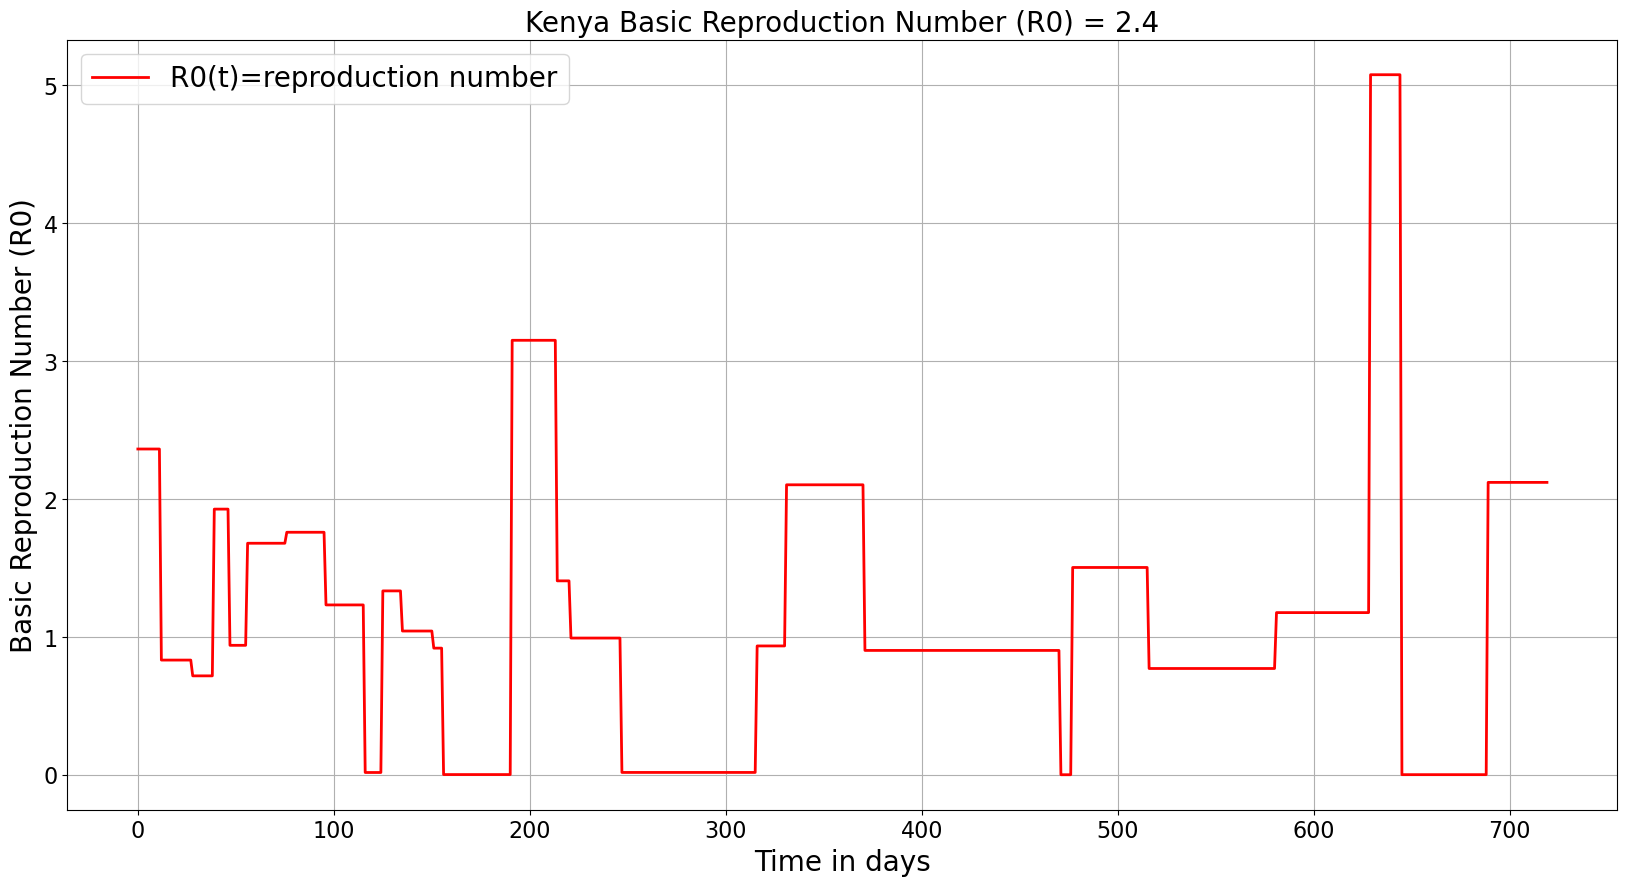

In [7]:
plt.rcParams["font.weight"] #= \"bold\"
plt.rcParams["axes.labelweight"] #= \"bold\"
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
# Plotting The reproduction number


fig = plt.figure()
ax = plt.subplot(111)
#t = np.linspace(0, 67, 67)
plt.plot(t,R0,'r', label='R0(t)=reproduction number',linewidth=2) # plotting t, c separately 
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Kenya Basic Reproduction Number (R0) = 2.4',fontsize=20)
plt.xlabel("Time in days",fontsize=20)
plt.ylabel("Basic Reproduction Number (R0)",fontsize=20)
ax.legend(loc=2, prop={'size': 20})
#plt.xscale("log")
#plt.yscale("log")
plt.grid()
#plt.show()
##plt.savefig("Kenya_R(0).pdf")
#plt.savefig('KenyaCOVID19/Kenya_R(0).png', dpi = 300, bbox_inches='tight')



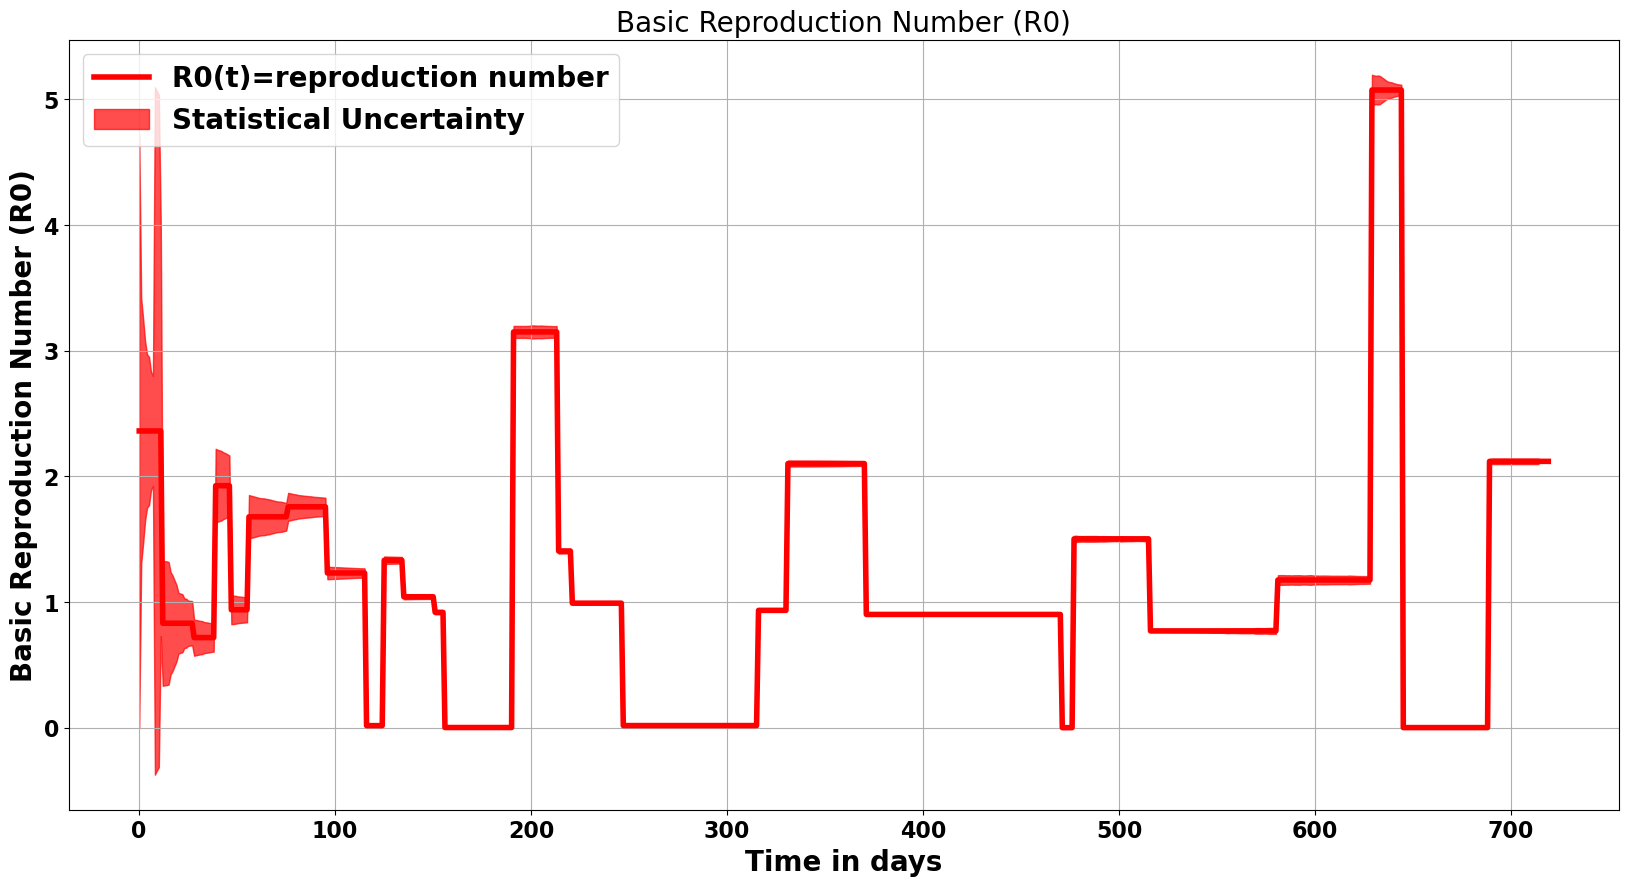

In [8]:
"""Toivo Uncertainty R0""" 
#Statistical uncertainty

dR0st=R0*(1/np.sqrt(data_active)+1/np.sqrt(data_recovered))

for i in range(len(data_time)):
    if(data_active[i]>0 and data_recovered[i]>0):
        dR0st[i]=R0[i]*(1/np.sqrt(data_active[i])+1/np.sqrt(data_recovered[i]))
    
    elif ( data_recovered[i]==0 and data_active[i]>0):
        dR0st[i]=R0[i]*(1/np.sqrt(data_active[i]))

    elif ( data_recovered[i]>0 and data_active[i]==0):
        dR0st[i]=R0[i]*(1/np.sqrt(data_recovered[i]))
    elif ( data_recovered[i]==0 and data_active[i]==0):
        dR0st[i]=0
    
  
# Plotting Statistical uncertainty

# Plotting The reproduction number




alpha=0.7
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
fig = plt.figure()
ax = plt.subplot(111)
#t = np.linspace(0, 67, 67)


plt.plot(t,R0,'r', label='R0(t)=reproduction number',linewidth=4) # plotting t, c separately 
plt.fill_between(t ,R0-dR0st,R0+dR0st,color='r',alpha=alpha,label='Statistical Uncertainty')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Basic Reproduction Number (R0)',fontsize=20)
plt.xlabel("Time in days",fontsize=20)
plt.ylabel("Basic Reproduction Number (R0)",fontsize=20)
ax.legend(loc=2, prop={'size': 20})
#plt.xscale("log")
#plt.yscale("log")
plt.grid(True)
##plt.show()
#fig.savefig('R0_StatisticalUncertainty.pdf')
#plt.savefig('KenyaCOVID19/R0_StatisticalUncertainty.png', dpi = 300, bbox_inches='tight')



In [9]:

#plt.xlabel("time(days)",fontsize=12)




par = 0.57,0.0114,0.0114,0.456,0.171,0.1254,0.0342, 0.1254, 0.0342, 0.3705,0.0171,0.0171,0.0274,0.0171,0.0171,0.00,0.015,0.00,0.00
R0=[]
parm=[]
t1=[]
for i in range(len(data_time)):
    #print(rzero(t,par))
    R0.append( rzero(i,par)[0])
    parm.append( rzero(i,par)[1])
    t1.append(i)
#print(R0)
#print(parm)
t= np.array(t1, dtype=float)
#print(t)
#t2 = np.linspace(0, 151, 152)
parm[0]
par1= np.array(parm, dtype=float)

#void bfunc ( double* par, double* ttime, double* stemp, double* itemp, double* dtemp, double* atemp,  
#double* rtemp, double* ttemp, double* htemp, double* etemp, double* R0, bool dofit = false) {

"""fitting the SIDARTHE Model to the data"""
alpha1=[]
beta1=[]
delta1=[]
gamma1=[]
epsilon1=[]
zeta1=[]
lamda1=[]
eta1=[]
rho1=[]
theta1=[]
mu1=[]
kappa1=[]
nu1=[]
chi1=[]
sigma1=[]
tau_a1=[]
tau1=[]
alpha_p1=[]
phi1=[]
for i in range(len(data_time)):
    alpha1.append(par1[i][0])
    beta1.append(par1[i][1])
    delta1.append(par1[i][2])
    gamma1.append(par1[i][3])
    epsilon1.append(par1[i][4])
    zeta1.append(par1[i][5])
    lamda1.append(par1[i][6])
    eta1.append(par1[i][7])
    rho1.append(par1[i][8])
    theta1.append(par1[i][9])
    mu1.append(par1[i][10])
    kappa1.append(par1[i][11])
    nu1.append(par1[i][12])
    chi1.append(par1[i][13])
    sigma1.append(par1[i][14])
    tau_a1.append(par1[i][15])
    tau1.append(par1[i][16])
    alpha_p1.append(par1[i][17])
    phi1.append(par1[i][18])


alpha2=np.array(alpha1)
beta2=np.array(beta1)
delta2=np.array(delta1)
gamma2=np.array(gamma1)
epsilon2=np.array(epsilon1)
zeta2=np.array(zeta1)
lamda2=np.array(lamda1)
eta2=np.array(eta1)
rho2=np.array(rho1)
theta2=np.array(theta1)
mu2=np.array(mu1)
kappa2=np.array(kappa1)
nu2=np.array(nu1)
chi2=np.array(chi1)
sigma2=np.array(sigma1)
tau_a2=np.array(tau_a1)
tau2=np.array(tau1)
alpha_p2=np.array(alpha_p1) 
phi2=np.array(phi1)







alpha=interp1d(t,alpha2,bounds_error=False, fill_value="extrapolate")
beta=interp1d(t,beta2,bounds_error=False, fill_value="extrapolate")
delta=interp1d(t,delta2,bounds_error=False, fill_value="extrapolate")
gamma=interp1d(t,gamma2,bounds_error=False, fill_value="extrapolate")
epsilon=interp1d(t,epsilon2,bounds_error=False, fill_value="extrapolate")
zeta=interp1d(t,zeta2,bounds_error=False, fill_value="extrapolate")
lamda=interp1d(t,lamda2,bounds_error=False, fill_value="extrapolate")
eta=interp1d(t,eta2,bounds_error=False, fill_value="extrapolate")
rho=interp1d(t,rho2,bounds_error=False, fill_value="extrapolate")
theta=interp1d(t,theta2,bounds_error=False, fill_value="extrapolate")
mu=interp1d(t,mu2,bounds_error=False, fill_value="extrapolate")
kappa=interp1d(t,kappa2,bounds_error=False, fill_value="extrapolate")
nu=interp1d(t,nu2,bounds_error=False, fill_value="extrapolate")
chi=interp1d(t,chi2,bounds_error=False, fill_value="extrapolate")
sigma=interp1d(t,sigma2,bounds_error=False, fill_value="extrapolate")
tau_a=interp1d(t,tau_a2,bounds_error=False, fill_value="extrapolate")
tau=interp1d(t,tau2,bounds_error=False, fill_value="extrapolate")
alpha_p=interp1d(t,alpha_p2,bounds_error=False, fill_value="extrapolate")
phi=interp1d(t,phi2,bounds_error=False, fill_value="extrapolate")


In [10]:
N=47e6
def SIDARTHEV_model(y, t,N, alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,tau_a,tau,alpha_p,phi):
    S = y[0]   #Succeptible
    I = y[1]   #Infected asymptomatic undetected
    D = y[2]   #Diagnosed asymptomatic infected detected
    A = y[3]   #Ailing symptomatic infected undetected
    R = y[4]   # Recognised symptomatic infected detected
    T = y[5]   #Treathened accutely symptomatic infected detected
    H = y[6]   # Healed
    E = y[7]   # Extinct (deads)
    V = y[8]
    U = y[9]
    return [-S*(alpha(t)*I + beta(t)*D +gamma(t)*A + delta(t)*R) - phi(t)*S,
            S*(alpha(t)*I + beta(t)*D +gamma(t)*A + delta(t)*R) + alpha_p(t)*I*V-(epsilon(t)+lamda(t)+zeta(t))*I,
            epsilon(t)*I-(eta(t)+rho(t))*D,
            zeta(t)*I-(theta(t)+mu(t)+kappa(t))*A,
            eta(t)*D +theta(t)*A-(tau_a(t) + nu(t) + chi(t))*R,
            mu(t)*A+nu(t)*R-(sigma(t)+tau(t))*T,
            lamda(t)*I +rho(t)*D + kappa(t)*A  + sigma(t)*T +chi(t)*R,
            tau_a(t)*R + tau(t)*T,
            - alpha_p(t)*I*V + phi(t)*S,
            lamda(t)*I]





I0=  0.0/N#20./N
D0=  1/N     #9./N
A0=  0.25/N       #1./N
R0= 1/N            #2./N
T0=0.00
H0=0.00
E0=0.00
V0=0.00
S0=1-I0-D0-A0-R0-T0-H0-E0-V0
U0=0.00
y0 = S0,I0,D0,A0,R0,T0,H0,E0,V0,U0

#time (days)
#t = np.linspace(0, 67, 67)

# Integrate the SIR equations over the time grid, t.
ret = odeint(SIDARTHEV_model, y0, t, args=(N, alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,tau_a,tau,alpha_p,phi))
S,I,D,A,R,T,H,E,V,U= ret.T
len(S)

    
    



        
        
        
        
        
        
        
        



720

In [11]:
actif_sidarthe=[]
#total_sidarthe = []
t=[]

for i in range(len(data_time)): 
    t.append(i)
    actif_sidarthe.append(A[i]+T[i]+R[i])
#    total_sidarthe.append(actif_sidarthe[i]+H[i]+E[i])
    


In [12]:
total_sidarthe = []
t=[]
for i in range(len(data_time)):
    t.append(i)
    total_sidarthe.append(A[i]+T[i]+R[i]+H[i]+E[i])
len(t) 
    
    #print(len(t))
    
    

    
#co= pd.read_csv('_covidata.csv')

#data_infected =co.Total_Infected
 
#data_time   = co.Days
#print(len(co.Days))

#data_recovered  = co.Total_Recovered

#data_dead  = co.Total_Deaths

#data_active = co.Active_Cases

720

In [13]:
Dactive=[]
Ddead=[]
Drecovered=[]
Dinfected=[]

for i in data_active:
    Dactive.append(i/N)    
for i in data_infected:
    Dinfected.append(i/N)    
for i in data_dead:
    Ddead.append(i/N) 
for i in data_recovered:
    Drecovered.append(i/N)


error_infected=((np.sqrt((data_infected)))/N)
error_dead=((np.sqrt((data_dead)))/N)
error_active=((np.sqrt((data_active)))/N)
error_recovered=((np.sqrt((data_recovered)))/N)


error_Total_Vaccinated=((np.sqrt((dados['Total_Vaccinated'])))/N)
error_Fully_Vaccinated=((np.sqrt((dados['Fully_Vaccinated'])))/N)


#print(len(data_time))
#print(len(data_infected))
#print(len(data_infected-error_infected))

In [14]:
# #print(error_dead)
# len(error_dead)
# #fig = plt.figure()
# #16 Modelling
# fig = plt.figure()
# alpha=0.7
# ax = plt.subplot(111)
# plt.errorbar(t, Dinfected,yerr=error_infected, fmt='o', color='lime',label='Total Infected', elinewidth=4,capsize=5)
# plt.errorbar(t, Drecovered,yerr=error_recovered, fmt='o', color='aqua',label='Total Recovered', elinewidth=4,capsize=5) # plotting t, c separately 
# plt.errorbar(t, Dactive,yerr=error_active,fmt='o', color='blue',label='Active Cases', elinewidth=4,capsize=5) # plotting t, c separately
# plt.errorbar(t, Ddead, yerr=error_dead, fmt='o', color='grey',label='Dead', elinewidth=4,capsize=5)
# plt.fill_between(data_time ,Dinfected-error_infected,Dinfected+error_infected,color='g',alpha=alpha,label='Infected')
# plt.fill_between(data_time ,Dactive-error_active,Dactive+error_active,color='b',alpha=alpha,label='Active')
# plt.fill_between(data_time ,Drecovered-error_recovered,Drecovered+error_recovered,color='c',alpha=alpha,label='Recovered')
# plt.fill_between(data_time ,Ddead-error_dead,Ddead+error_dead,color='gray',alpha=alpha,label='Dead')



# plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)
# plt.xlabel("Time in days",fontsize=20)
# plt.ylabel("Fractions of Population",fontsize=20)

# plt.title('Covid-19 in Kenya', fontsize=20)
# plt.legend()
# ax.legend(loc=2, prop={'size': 15})
# plt.yscale('log',nonposy='clip')
# #plt.ylim(10**-9, 10**-2)
# plt.grid(True)

# Unaffected=lamda2*I
# #print(len(I))

# ###############N=2.9e7






In [15]:
dR0syst=R0*((U)/(H))*N


DR0= np.sqrt((dR0st*dR0st)+(dR0syst*dR0syst))



par = 0.57,0.0114,0.0114,0.456,0.171,0.1254,0.0342, 0.1254, 0.0342, 0.3705,0.0171,0.0171,0.0274,0.0171,0.0171,0.00, 0.015,0.00,0.00
R0=[]
parm=[]
t1=[]
for i in range(len(data_time)):
    #print(rzero(t,par))
    R0.append( rzero(i,par)[0])
    parm.append( rzero(i,par)[1])
    t1.append(i)
#print(R0)
#print(parm)
t= np.array(t1, dtype=float)
#print(t)
#t2 = np.linspace(0, 151, 152)
parm[0]
par1= np.array(parm, dtype=float)

#void bfunc ( double* par, double* ttime, double* stemp, double* itemp, double* dtemp, double* atemp,  
#double* rtemp, double* ttemp, double* htemp, double* etemp, double* R0, bool dofit = false) {


/tmp/ipykernel_24879/2815287399.py:1: RuntimeWarning: invalid value encountered in true_divide
  dR0syst=R0*((U)/(H))*N


In [16]:

Goodness=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,          
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
print(len(Goodness))

720


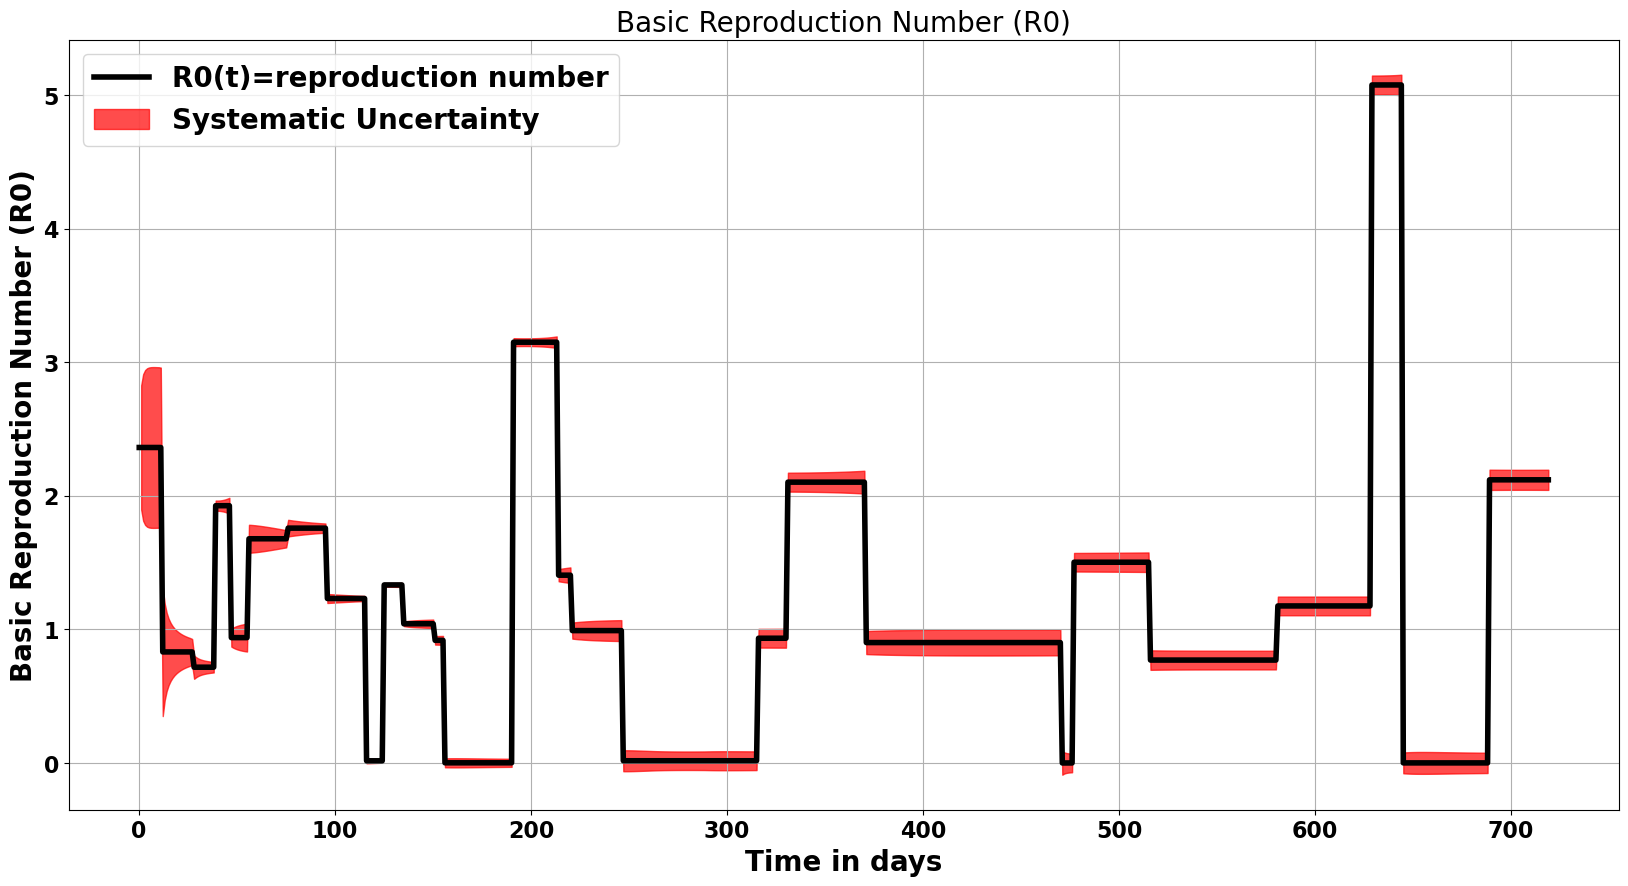

In [17]:

alpha=0.7
# Plotting The reproduction number
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
fig = plt.figure()
ax = plt.subplot(111)
#t = np.linspace(0, 67, 67)

plt.plot(t,R0,'black', label='R0(t)=reproduction number',linewidth=4) # plotting t, c separately 
plt.fill_between(t ,R0-dR0syst,R0+dR0syst,color='r',alpha=alpha,label='Systematic Uncertainty')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Basic Reproduction Number (R0)',fontsize=20)
plt.xlabel("Time in days",fontsize=20)
plt.ylabel("Basic Reproduction Number (R0)",fontsize=20)
ax.legend(loc=2, prop={'size': 20})
#plt.xscale("log")
#plt.yscale("log")
plt.grid(True)
#plt.show()
##fig.savefig('R0_SytematicUncertainty.pdf')
#plt.savefig('KenyaCOVID19/R0_SytematicUncertainty.png', dpi = 300, bbox_inches='tight')

720
720


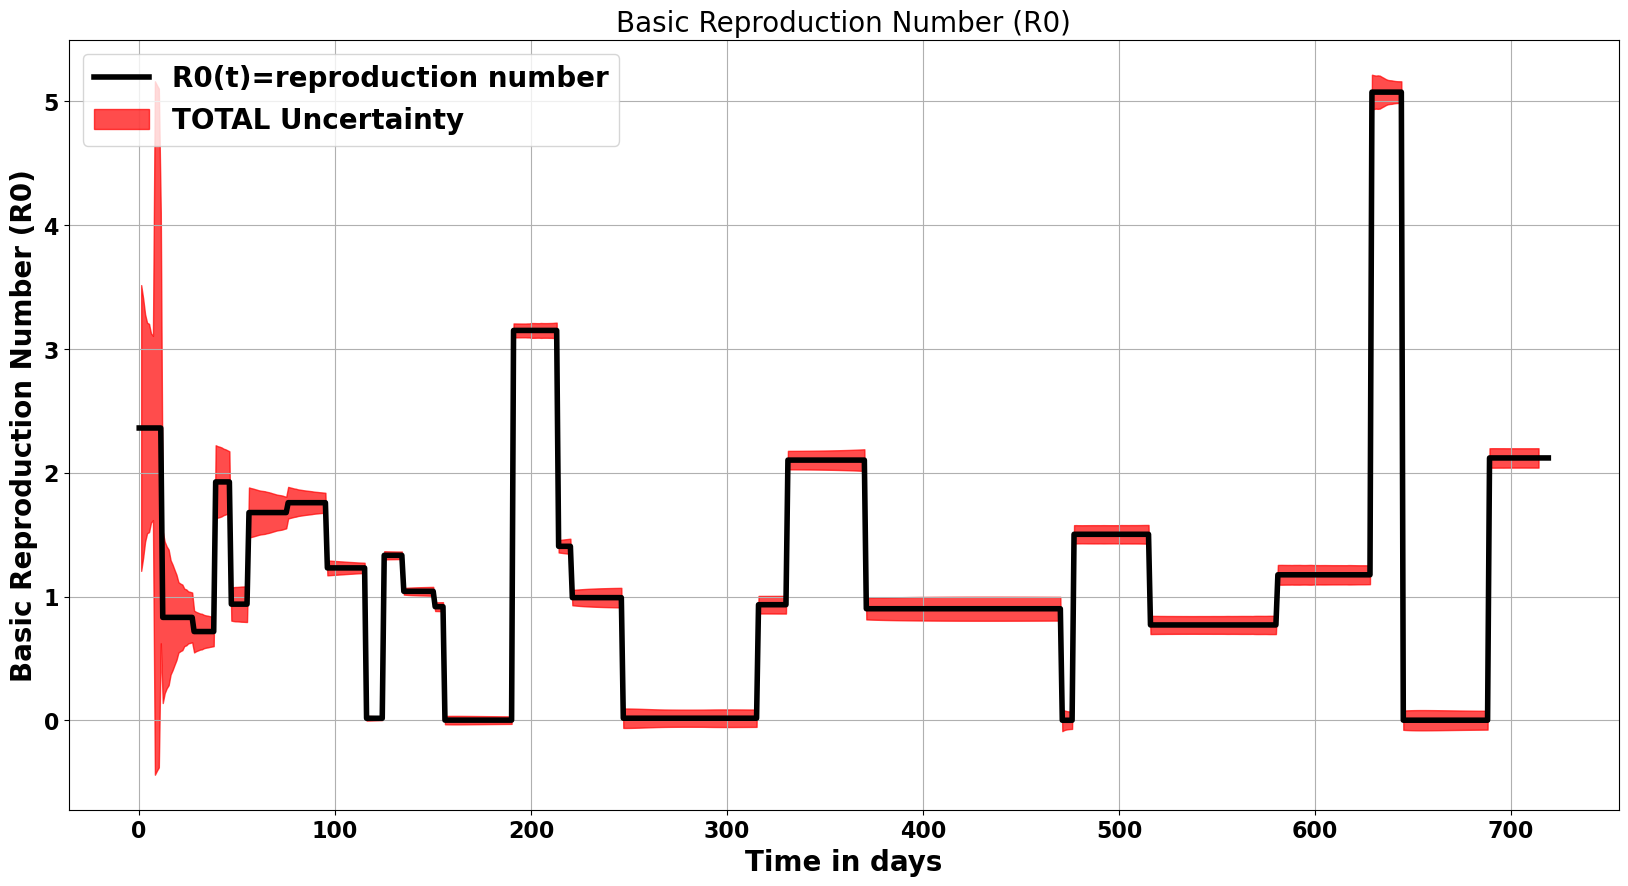

In [18]:
alpha=0.7
# Plotting The reproduction number
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
fig = plt.figure()
ax = plt.subplot(111)
#t = np.linspace(0, 67, 67)

plt.plot(t,R0,'black', label='R0(t)=reproduction number',linewidth=4) # plotting t, c separately 
plt.fill_between(t ,R0-DR0,R0+DR0,color='r',alpha=alpha,label='TOTAL Uncertainty')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Basic Reproduction Number (R0)',fontsize=20)
plt.xlabel("Time in days",fontsize=20)
plt.ylabel("Basic Reproduction Number (R0)",fontsize=20)
ax.legend(loc=2, prop={'size': 20})
#plt.xscale("log")
#plt.yscale("log")
plt.grid(True)
#plt.show()
##fig.savefig('R0_TotalUncertaninty.pdf')
#plt.savefig('KenyaCOVID19/R0_TotalUncertainty.png', dpi = 300, bbox_inches='tight')
print(len(R0))
print(len(DR0))

/usr/lib/python3/dist-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  ret

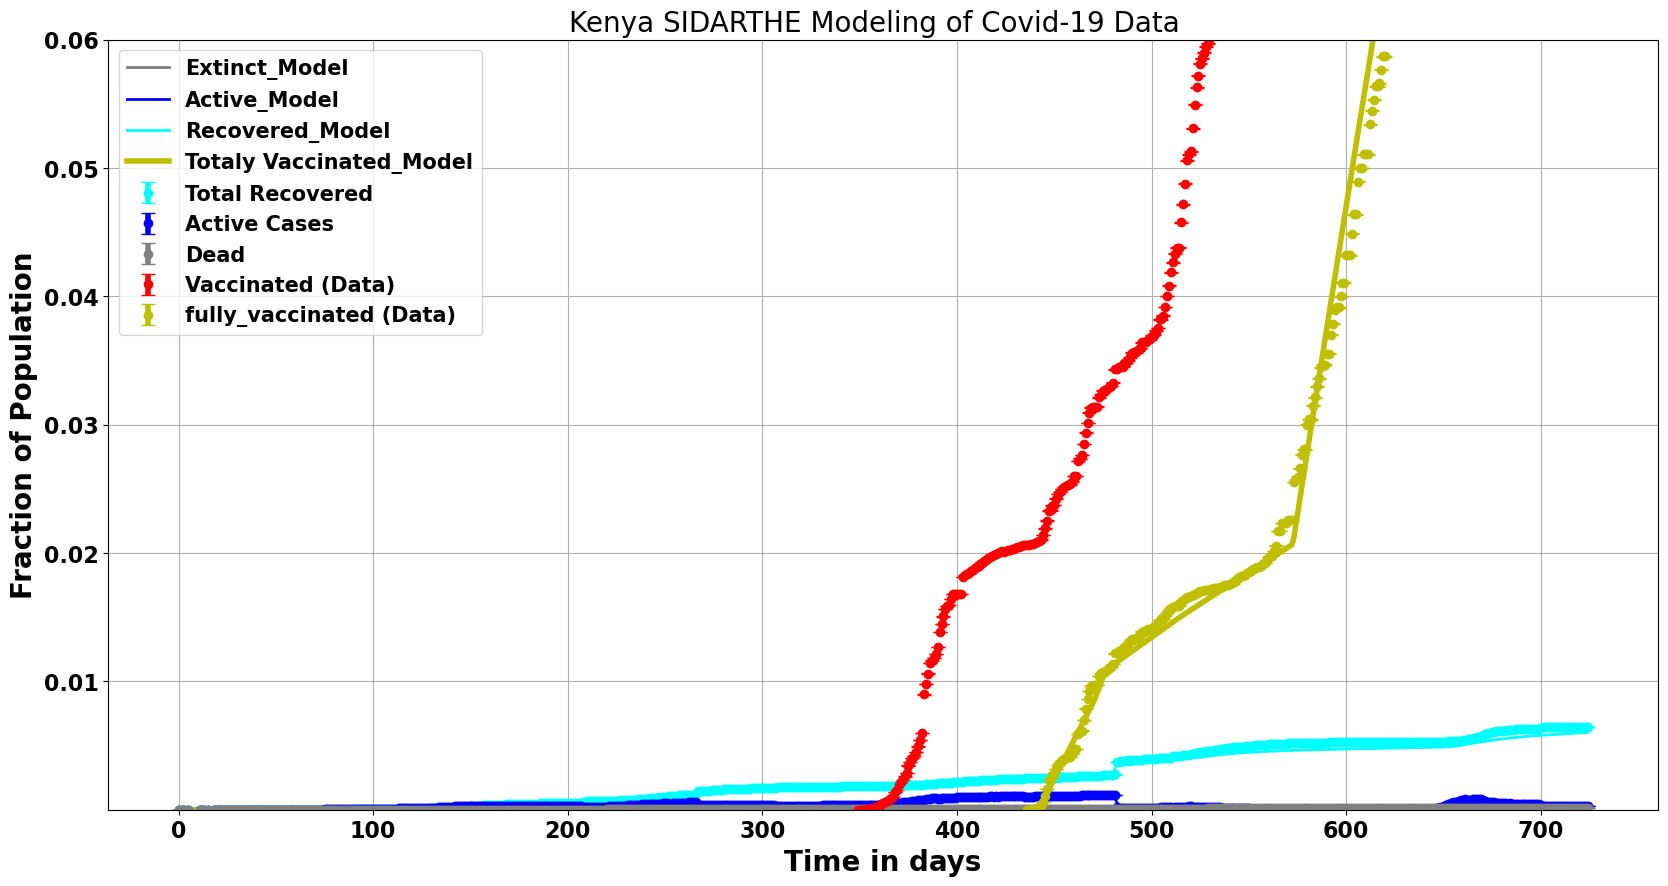

In [19]:
"""Fitting SIRDATHE based on Toivo's plots"""
fig = plt.figure()
ax = plt.subplot(111)
#plt.errorbar(data_time, Dinfected,yerr=error_infected, fmt='o', color='lime',label='Total Infected', elinewidth=4,capsize=5)
plt.errorbar(data_time, Drecovered,yerr=error_recovered, fmt='o', color='aqua',label='Total Recovered', elinewidth=4,capsize=5) # plotting t, c separately 
plt.errorbar(data_time, Dactive,yerr=error_active,fmt='o', color='blue',label='Active Cases', elinewidth=4,capsize=5) # plotting t, c separately
plt.errorbar(data_time, Ddead, yerr=error_dead, fmt='o', color='grey',label='Dead', elinewidth=4,capsize=5)

plt.plot(data_time, E,'grey',label='Extinct_Model',linewidth=2) # plotting t, c separately
plt.plot(data_time, actif_sidarthe,'blue',label='Active_Model',linewidth=2) # plotting t, c separately
plt.plot(data_time, H,'aqua',label='Recovered_Model',linewidth=2) # plotting t, b 2eparately 
#plt.plot(data_time, total_sidarthe, 'lime', label='Infected_Model', linewidth=2)



plt.errorbar(dados['Days1'] ,dados['Fration_Total_Vaccinated'],yerr=error_Total_Vaccinated,fmt='o', color='red',label='Vaccinated (Data)',elinewidth=4,capsize=5)
plt.errorbar(dados['Days1'],dados['Fration_Fully_Vaccinated'],yerr=error_Fully_Vaccinated,fmt='o', color='y',label='fully_vaccinated (Data) ',elinewidth=4,capsize=5)
plt.plot(t, V,'y',label='Totaly Vaccinated_Model',linewidth=4)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Time in days",fontsize=20)
plt.ylabel("Fraction of Population",fontsize=20)
plt.title('Kenya SIDARTHE Modeling of Covid-19 Data  ',fontsize=20)
plt.legend()
ax.legend(loc=2, prop={'size': 15})
#plt.yscale('log')
plt.ylim(10**-9,6*10**-2)
plt.grid(True)
#plt.show()
##fig.savefig('kenya_SIDARTHE_model_fitting.pdf')
#plt.savefig('KenyaCOVID19/Kenya_SIDARTHE_MODEL_FITTING_logscale.png', dpi = 300, bbox_inches='tight')



In [20]:
t2= [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,
             41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,
             79,80,81,82,83,84,85,86,87,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,
             113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,
             141,142,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,159,159,160,161,162,163,164,165,166,167,
             168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,
             196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,
             224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,
             252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,
             280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,
             308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,
             336, 337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,
             364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,
             380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,
             408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,
             436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,
             464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,
             491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,
             519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,
             547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,
             575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,
             602,603,604,605,606,607,608,609,610,611,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,
             632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,
             660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,
             690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,
            720];
print(len(data_time))

t1=t2[437:-1]

720


/usr/lib/python3/dist-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  ret

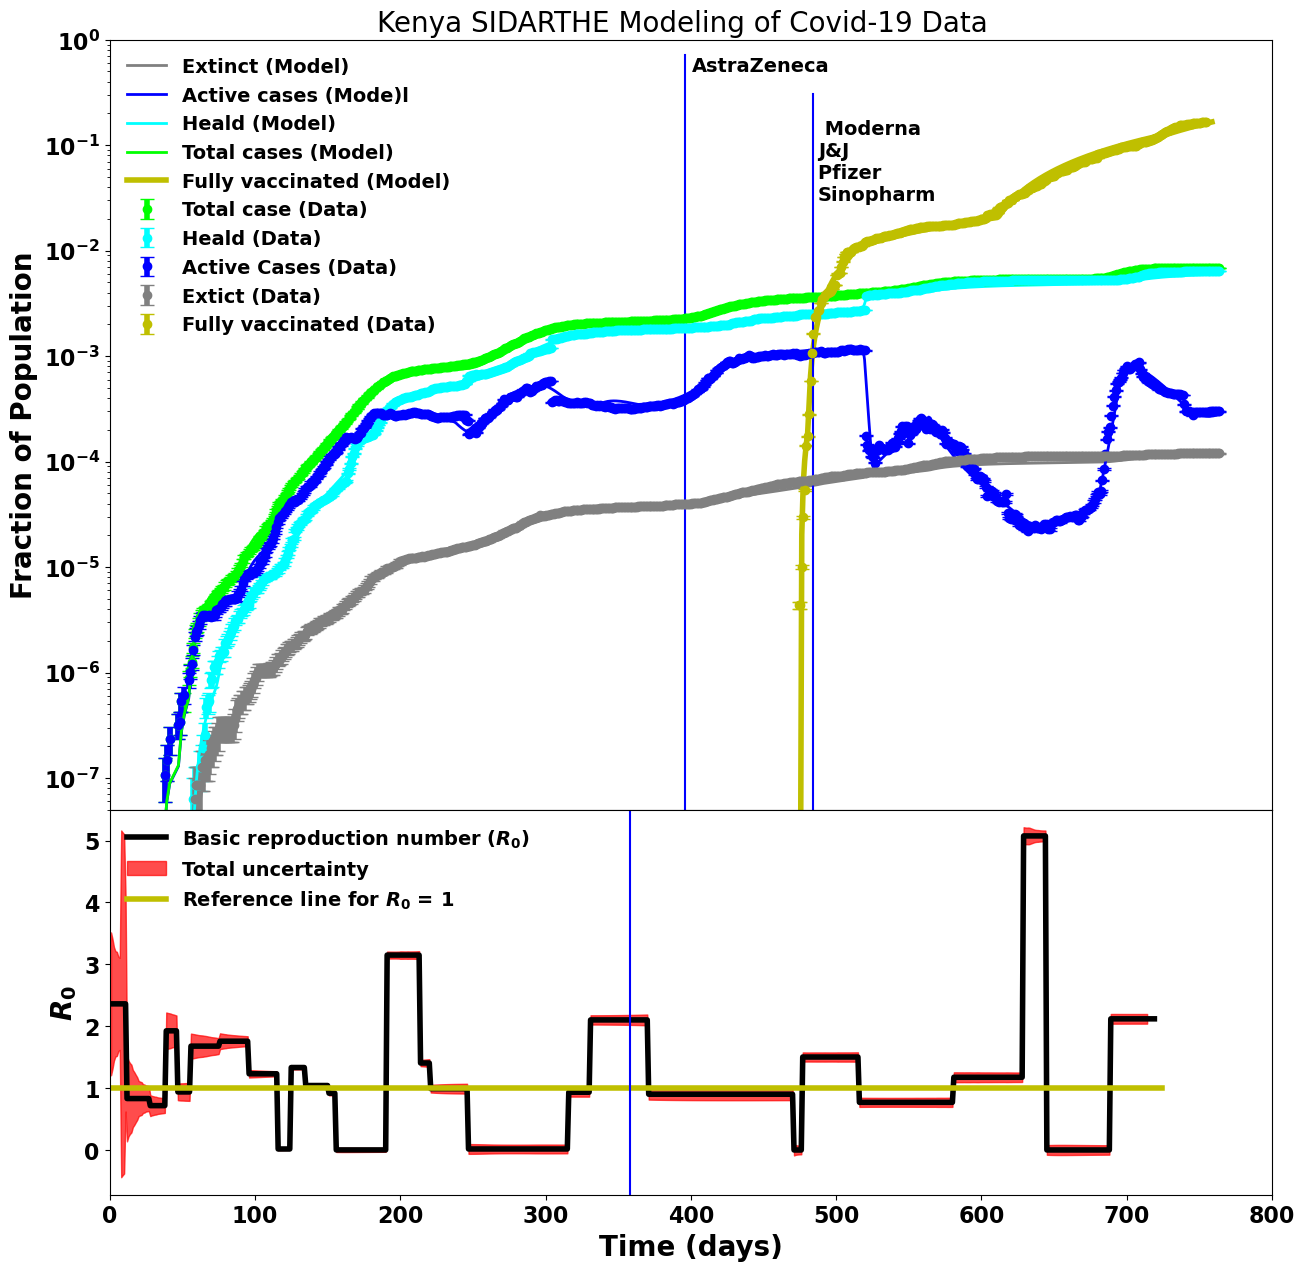

In [21]:
"""Fitting SIRDATHE based on Toivo's plots"""
fig = plt.figure(figsize=(15,15))
gs=gridspec.GridSpec(2,1, height_ratios=[2,1])

ax0=plt.subplot(gs[0])
ax0.set_yscale('log')

alpha=.4
width = 4



# fig = plt.figure(figsize=(15,15))
# gs=gridspec.GridSpec(2,1, height_ratios=[2,1])
# ax0=plt.subplot(gs[0])
# ax0.set_yscale('log')


plt.errorbar(data_time, Dinfected,yerr=error_infected, fmt='o', color='lime',label='Total case (Data)', elinewidth=4,capsize=5)
plt.errorbar(data_time, Drecovered,yerr=error_recovered, fmt='o', color='aqua',label='Heald (Data)', elinewidth=4,capsize=5) # plotting t, c separately 
plt.errorbar(data_time, Dactive,yerr=error_active,fmt='o', color='blue',label='Active Cases (Data)', elinewidth=4,capsize=5) # plotting t, c separately
plt.errorbar(data_time, Ddead, yerr=error_dead, fmt='o', color='grey',label='Extict (Data)', elinewidth=4,capsize=5)

plt.plot(data_time, E,'grey',label='Extinct (Model)',linewidth=2) # plotting t, c separately
plt.plot(data_time, actif_sidarthe,'blue',label='Active cases (Mode)l',linewidth=2) # plotting t, c separately
plt.plot(data_time, H,'aqua',label='Heald (Model)',linewidth=2) # plotting t, b 2eparately 
plt.plot(data_time, total_sidarthe, 'lime', label='Total cases (Model)', linewidth=2)



#plt.errorbar(dados['Days1'] ,dados['Fration_Total_Vaccinated'],yerr=error_Total_Vaccinated,fmt='o', color='red',label='Vaccinated (Data)',elinewidth=4,capsize=5)
plt.errorbar(dados['Days1'],dados['Fration_Fully_Vaccinated'],yerr=error_Fully_Vaccinated,fmt='o', color='y',label='Fully vaccinated (Data) ',elinewidth=4,capsize=5)
plt.plot(t1, V[t1],'y',label='Fully vaccinated (Model)',linewidth=4)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Time in days",fontsize=20)
plt.ylabel("Fraction of Population",fontsize=20)
plt.title('Kenya SIDARTHE Modeling of Covid-19 Data  ',fontsize=20)
plt.legend()
plt.legend(frameon=False,fontsize=14)
#ax.legend(loc=2, prop={'size': 15})
plt.yscale('log')
plt.ylim(5*10**-8, 10**0)
plt.grid(False)

plt.axvline(358,ymax= .98,c='b')
plt.axvline(446, ymax= .93,c='b')
plt.text(363, 0.5, 'AstraZeneca', fontsize=14)
plt.text(449, 0.03, ' Moderna \nJ&J \nPfizer \nSinopharm', fontsize=14)



ax1=plt.subplot(gs[1])



alpha=0.7
# Plotting The reproduction number
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

#t = np.linspace(0, 67, 67)

plt.plot(t,R0,'black', label='Basic reproduction number ($R_{0}$)',linewidth=4) # plotting t, c separately 
plt.fill_between(t ,R0-DR0,R0+DR0,color='r',alpha=alpha,label='Total uncertainty')
#plt.plot(data_time[: :10],Goodness[: :10],'y.-.',linewidth=4,label='Reference line for $R_0$ = 1 ')
plt.plot(data_time,Goodness,'y',linewidth=4,label='Reference line for $R_0$ = 1 ')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.title('Basic Reproduction Number (R0)_Cameroon ',fontsize=20)
plt.xlabel("Time (days)",fontsize=20)
plt.ylabel("$R_0$",fontsize=20)
plt.legend(loc='upper right',prop={'size':14})
#plt.xscale("log")
#plt.yscale("log")
#plt.grid(True)
plt.axvline(358,c='b')
plt.subplots_adjust(hspace=.0)
plt.legend(frameon=False, fontsize=14)
plt.xlim(0,800)
plt.savefig("ModelingKEN", dpi=300, bbox_inches='tight')



#plt.show()
##fig.savefig('kenya_SIDARTHE_model_fitting.pdf')
#plt.savefig('KenyaCOVID19/Kenya_SIDARTHE_MODEL_FITTING_logscale.png', dpi = 300, bbox_inches='tight')

#plt.savefig("Modeling of Covid-19 (Data, code,vacination, vacination and R0)", dpi=300, bbox_inches='tight')

In [22]:
data_active=pd.Series(data_active)
data_time=pd.Series(data_time)
data_fullyvac=dados['Fully_Vaccinated']
#data_time_vac=dados['Days1']
R0=pd.Series(R0)






# CODE A
# First wave
wave_onset_b = [0]
# Find on the active plots the intervals which contain a minimum
onset_in_intervals = [[250, 350], [475, 490], [585, 615]]
# Create a list of the onset days
wave_onset_b.extend([val[1] -1 - int(data_active[val[0]: val[1]].iloc[-1:0:-1].argmin()) for val in onset_in_intervals])
print("Onset days:", wave_onset_b)
print("BACWARD RESULTS")
print("Corresponding fully vaccinated cases :\n",data_fullyvac.fillna(method='ffill')[wave_onset_b])
print("Corresponding active cases :\n",data_active[wave_onset_b])
print("Corresponding days :\n", data_time[wave_onset_b])
print("Ro details \n", type(R0), R0.shape, "\n R0 values\n", R0[wave_onset_b])
print("Total population :", N)
herd_b = N *( 1 - 1/R0[wave_onset_b])
print("Must be vaccinated at the wave onset: \n", herd_b)








Onset days: [0, 311, 478, 592]
BACWARD RESULTS
Corresponding fully vaccinated cases :
 0            NaN
311          NaN
478     521720.0
592    1780000.0
Name: Fully_Vaccinated, dtype: float64
Corresponding active cases :
 0          1.0
311    14818.0
478     4595.0
592     1074.0
Name: Active_Cases, dtype: float64
Corresponding days :
 0        0.0
311    321.0
478    488.0
592    602.0
Name: Days, dtype: float64
Ro details 
 <class 'pandas.core.series.Series'> (720,) 
 R0 values
 0      2.361818
311    0.017577
478    1.503202
592    1.176068
dtype: float64
Total population : 47000000.0
Must be vaccinated at the wave onset: 
 0      2.710007e+07
311   -2.626945e+09
478    1.573341e+07
592    7.036337e+06
dtype: float64


In [23]:
# CODE B
# First wave
wave_onset_f = [0]
# Find on the active plots the intervals which contain a minimum
onset_in_intervals = [[250, 350], [475, 490], [585, 615]]
# Create a list of the onset days
wave_onset_f.extend([val[0] + int(data_active[val[0]: val[1]].argmin()) for val in onset_in_intervals])
print("Onset days:", wave_onset_f)
print("FORWARD RESULTS")
print("Corresponding fully vaccinated cases :\n",data_fullyvac.fillna(method='ffill')[wave_onset_f])
print("Corresponding active cases :\n",data_active[wave_onset_f])
print("Corresponding days :\n", data_time[wave_onset_f])
print("R0 details \n", type(R0), R0.shape, "\n R0 values\n", R0[wave_onset_f])
print("Total population :", N)
herd = N *( 1 - 1/R0[wave_onset_f])
print("Must be vaccinated at the wave onset: \n", herd)

Onset days: [0, 311, 478, 592]
FORWARD RESULTS
Corresponding fully vaccinated cases :
 0            NaN
311          NaN
478     521720.0
592    1780000.0
Name: Fully_Vaccinated, dtype: float64
Corresponding active cases :
 0          1.0
311    14818.0
478     4595.0
592     1074.0
Name: Active_Cases, dtype: float64
Corresponding days :
 0        0.0
311    321.0
478    488.0
592    602.0
Name: Days, dtype: float64
R0 details 
 <class 'pandas.core.series.Series'> (720,) 
 R0 values
 0      2.361818
311    0.017577
478    1.503202
592    1.176068
dtype: float64
Total population : 47000000.0
Must be vaccinated at the wave onset: 
 0      2.710007e+07
311   -2.626945e+09
478    1.573341e+07
592    7.036337e+06
dtype: float64


/usr/lib/python3/dist-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  ret

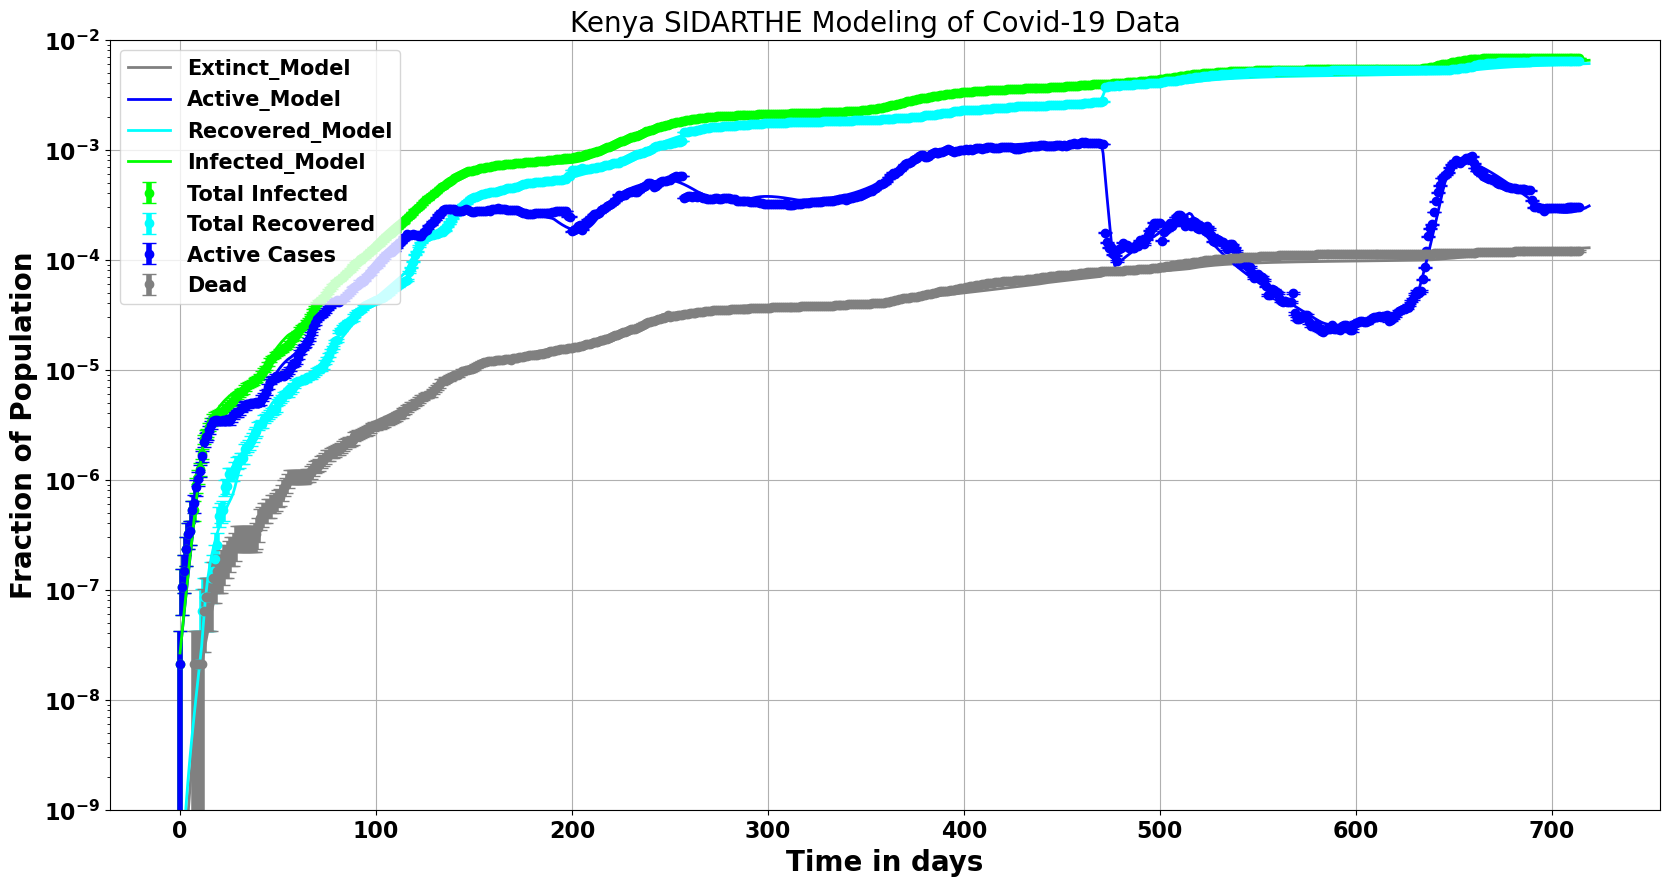

In [24]:
"""Fitting SIRDATHE based on Toivo's plots"""
fig = plt.figure()
ax = plt.subplot(111)
plt.errorbar(t, Dinfected,yerr=error_infected, fmt='o', color='lime',label='Total Infected', elinewidth=4,capsize=5)
plt.errorbar(t, Drecovered,yerr=error_recovered, fmt='o', color='aqua',label='Total Recovered', elinewidth=4,capsize=5) # plotting t, c separately 
plt.errorbar(t, Dactive,yerr=error_active,fmt='o', color='blue',label='Active Cases', elinewidth=4,capsize=5) # plotting t, c separately
plt.errorbar(t, Ddead, yerr=error_dead, fmt='o', color='grey',label='Dead', elinewidth=4,capsize=5)

plt.plot(t, E,'grey',label='Extinct_Model',linewidth=2) # plotting t, c separately
plt.plot(t, actif_sidarthe,'blue',label='Active_Model',linewidth=2) # plotting t, c separately
plt.plot(t, H,'aqua',label='Recovered_Model',linewidth=2) # plotting t, b 2eparately 
plt.plot(t, total_sidarthe, 'lime', label='Infected_Model', linewidth=2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Time in days",fontsize=20)
plt.ylabel("Fraction of Population",fontsize=20)
plt.title('Kenya SIDARTHE Modeling of Covid-19 Data  ',fontsize=20)
plt.legend()
ax.legend(loc=2, prop={'size': 15})
plt.yscale('log')
plt.ylim(10**-9, 10**-2)
plt.grid(True)
#plt.show()
##fig.savefig('kenya_SIDARTHE_model_fitting.pdf')
#plt.savefig('KenyaCOVID19/Kenya_SIDARTHE_MODEL_FITTING_logscale.png', dpi = 300, bbox_inches='tight')





In [25]:
# fig = plt.figure()
# ax = plt.subplot(111)


# #plt.semilogy(data_time ,Dinfecteds,'o',label='Infecteds',linewidth=6,color='g')
# #plt.semilogy(data_time ,Dactifs,'o',label='Actifs',linewidth=6,color='b')
# #plt.semilogy(data_time ,Drecovereds,'o',label='Recovered',linewidth=6,color='c')
# #plt.semilogy(data_time ,Ddeads,'o',label='Dead',linewidth=6,color='gray')

# alpha=0.7
# #plt.errorbar(data_time ,Dinfecteds,yerr=error_infectedf,fmt='o',color='g',label='Infected',elinewidth=4,capsize=5)
# #plt.fill_between(data_time ,Dinfecteds-error_infectedf,Dinfecteds+error_infectedf,color='g',alpha=alpha,label='Infected')
# #plt.fill_between(data_time ,Dactifs-error_actif,Dactifs+error_actif,color='b',alpha=alpha,label='Active')
# #plt.fill_between(data_time ,Drecovereds-error_recovered,Drecovereds+error_recovered,color='c',alpha=alpha,label='Recovered')
# #plt.fill_between(data_time ,Ddeads-error_dead,Ddeads+error_dead,color='gray',alpha=alpha,label='Dead')



# plt.fill_between(data_time ,Dinfected-error_infected,Dinfected+error_infected,color='g',alpha=alpha,label='Infected')
# plt.fill_between(data_time ,Dactive-error_active,Dactive+error_active,color='b',alpha=alpha,label='Active')
# plt.fill_between(data_time ,Drecovered-error_recovered,Drecovered+error_recovered,color='c',alpha=alpha,label='Recovered')
# plt.fill_between(data_time ,Ddead-error_dead,Ddead+error_dead,color='gray',alpha=alpha,label='Dead')




# plt.plot(t, E,'gray',label='Extinct (Model)',linewidth=4) # plotting t, c separately 
# plt.plot(t, actif_sidarthe,'b',label='Active Cases (Model)',linewidth=4) # plotting t, c separately 
# plt.plot(t, H,'c',label='Healed (Model)',linewidth=4) # plotting t, b separately
# plt.plot(t,total_sidarthe, 'g',label='Total Cases (Model)',linewidth=4)

# plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)
# plt.xlabel("Time in days",fontsize=20)
# plt.ylabel("Fractions of Population",fontsize=20)

# plt.title('Modeling of Covid-19, Mozambique Data_Mozambique  ',fontsize=20)
# plt.legend()
# ax.legend(loc=2, prop={'size': 15})

# plt.yscale('log', nonposy='clip')
# plt.ylim(10**-8, 10**-2)
# plt.grid(True)
# #plt.ylim(0, 2*10**-4)

# fig.savefig('SIDARTHE_model_fitting.pdf')

In [26]:
# fig = plt.figure(figsize=(15,10))
# #gs=gridspec.GridSpec(2,1, height_ratios=[2,1])

# #ax0.set_yscale('log')

# alpha=0.7


# #plt.errorbar(data_time ,Dinfecteds,yerr=error_infectedf,fmt='o',color='g',label='Infected',elinewidth=4,capsize=5)
# #plt.fill_between(data_time ,Dinfecteds-error_infectedf,Dinfecteds+error_infectedf,color='g',alpha=alpha,label='Confirmed Cases (Data)')
# #plt.fill_between(data_time ,Dactifs-error_actif,Dactifs+error_actif,color='b',alpha=alpha,label='Active Cases (Data)')
# #plt.fill_between(data_time ,Drecovereds-error_recovered,Drecovereds+error_recovered,color='c',alpha=alpha,label='Healed (Data)')
# #plt.fill_between(data_time ,Ddeads-error_dead,Ddeads+error_dead,color='gray',alpha=alpha,label='Extinct (Data)')



# #plt.errorbar(data_time ,Dinfecteds,yerr=error_infectedf,fmt='o',color='g',label='Infected',elinewidth=4,capsize=5)
# plt.fill_between(data_time ,Dinfected-error_infected,Dinfected+error_infected,color='g',alpha=alpha,label='Confirmed Cases (Data)')
# plt.fill_between(data_time ,Dactive-error_active,Dactive+error_active,color='b',alpha=alpha,label='Active Cases (Data)')
# plt.fill_between(data_time ,Drecovered-error_recovered,Drecovered+error_recovered,color='c',alpha=alpha,label='Healed (Data)')
# plt.fill_between(data_time ,Ddead-error_dead,Ddead+error_dead,color='gray',alpha=alpha,label='Extinct (Data)')


# plt.plot(t, E,'gray',label='Extinct (Model)',linewidth=4) # plotting t, c separately 
# plt.plot(t, actif_sidarthe,'b',label='Active Cases (Model)',linewidth=4) # plotting t, c separately 
# plt.plot(t, H,'c',label='Healed (Model)',linewidth=4) # plotting t, b separately
# plt.plot(t,total_sidarthe, 'g',label='Total Cases (Model)',linewidth=4)


# plt.xticks(fontsize=0)
# plt.yticks(fontsize=16)
# #plt.xlabel("Time in days",fontsize=20)
# plt.ylabel("Fractions of Population",fontsize=20)

# plt.title('Modeling of COVID-19 (Mozambique ) ',fontsize=20)
# plt.legend()
# ax.legend(loc=2, prop={'size': 17})


# plt.yscale('log', nonposy='clip')
# plt.ylim(4*10**-8, 2*10**-2)
# #plt.grid(True)
# #plt.ylim(0, 2*10**-4)
# plt.legend(loc='upper left',prop={'size':14})
# plt.savefig("Modeling of Covid-19,Kenya", dpi=300, bbox_inches='tight')
# plt.legend(frameon=False, fontsize=15)

In [27]:
# fig = plt.figure(figsize=(15,10))
# gs=gridspec.GridSpec(2,1, height_ratios=[2,1])
# ax0=plt.subplot(gs[0])
# ax0.set_yscale('log')

# alpha=0.7
# #plt.errorbar(data_time ,Dinfecteds,yerr=error_infectedf,fmt='o',color='g',label='Infected',elinewidth=4,capsize=5)
# plt.fill_between(data_time ,Dinfected-error_infected,Dinfected+error_infected,color='g',alpha=alpha,label='Confirmed Cases (Data)')
# plt.fill_between(data_time ,Dactive-error_active,Dactive+error_active,color='b',alpha=alpha,label='Active Cases (Data)')
# plt.fill_between(data_time ,Drecovered-error_recovered,Drecovered+error_recovered,color='c',alpha=alpha,label='Healed (Data)')
# plt.fill_between(data_time ,Ddead-error_dead,Ddead+error_dead,color='gray',alpha=alpha,label='Extinct (Data)')


# plt.plot(t, E,'gray',label='Extinct (Model)',linewidth=4) # plotting t, c separately 
# plt.plot(t, actif_sidarthe,'b',label='Active Cases (Model)',linewidth=4) # plotting t, c separately 
# plt.plot(t, H,'c',label='Healed (Model)',linewidth=4) # plotting t, b separately
# plt.plot(t,total_sidarthe, 'g',label='Total Cases (Model)',linewidth=4)


# plt.xticks(fontsize=0)
# plt.yticks(fontsize=16)
# #plt.xlabel("Time in days",fontsize=20)
# plt.ylabel("Fractions of Population",fontsize=20)

# plt.title('Modeling of COVID-19 (Mozambique ) ',fontsize=20)
# plt.legend()
# ax.legend(loc=2, prop={'size': 17})


# plt.yscale('log', nonposy='clip')
# plt.ylim(4*10**-8, 2*10**-2)
# #plt.grid(True)
# #plt.ylim(0, 2*10**-4)
# plt.legend(loc='upper left',prop={'size':14})
# plt.savefig("Modeling of Covid-19,Kenya", dpi=300, bbox_inches='tight')
# plt.legend(frameon=False, fontsize=15)


# ax1=plt.subplot(gs[1], sharex=ax0)



# alpha=0.7
# # Plotting The reproduction number
# plt.rcParams["font.weight"] = "bold"
# plt.rcParams["axes.labelweight"] = "bold"
# fig_size = plt.rcParams["figure.figsize"]
# fig_size[0] = 20
# fig_size[1] = 10
# plt.rcParams["figure.figsize"] = fig_size

# #t = np.linspace(0, 67, 67)

# plt.plot(t,R0,'black', label='Basic reproduction number ($R_{0}$)',linewidth=4) # plotting t, c separately 
# plt.fill_between(t ,R0-DR0,R0+DR0,color='r',alpha=alpha,label='Total uncertainty')
# plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)
# #plt.title('Basic Reproduction Number (R0)_Cameroon ',fontsize=20)
# plt.xlabel("Time (days)",fontsize=20)
# plt.ylabel("$R_0$",fontsize=20)
# plt.legend(loc='upper right',prop={'size':14})
# #plt.xscale("log")
# #plt.yscale("log")
# #plt.grid(True)
# plt.subplots_adjust(hspace=.0)
# plt.legend(frameon=False, fontsize=15)
# #plt.savefig("Modeling1 of Covid-19, Kenya Data", dpi=300, bbox_inches='tight')

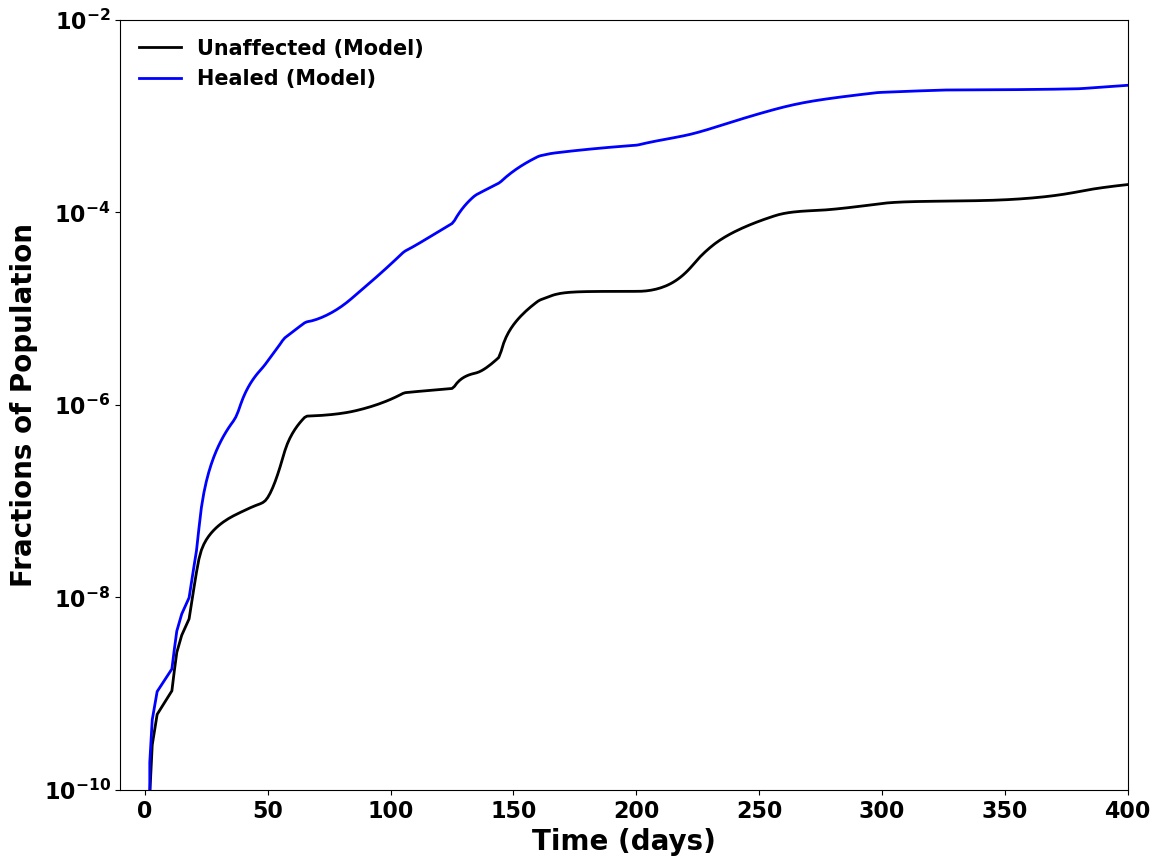

In [28]:
fig = plt.figure(figsize=(13,10))
ax = plt.subplot(111)
#t = np.linspace(0, 67, 67)
#plt.plot(data_time ,Unaffected,'black', label='Unaffected and Healed',linewidth=2)
plt.plot(data_time ,U,'black', label='Unaffected (Model)',linewidth=2)
plt.plot(data_time ,H,'b', label='Healed (Model)',linewidth=2)
# plotting t, c separately 
plt.ylim(10**-10,10**-2)
#plt.legend(frameon=False)
#.get_frame().set_lleginewidth(0.0)
#set_edgecolor('red')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.title('Unaffected_Mozambique',fontsize=20)
plt.xlabel("Time (days)",fontsize=20)
ax.legend(loc=2, prop={'size': 20})
plt.ylabel("Fractions of Population",fontsize=20)
plt.yscale("log")
#plt.grid()
#plt.grid()
plt.xlim(-10,400)
plt.legend(frameon=False, fontsize=15)
plt.savefig("Unaffected and Heald_Kenya", dpi=300, bbox_inches='tight')




/tmp/ipykernel_24879/1537783987.py:4: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(data_time ,U/H,'black', label='Unaffected/Healed',linewidth=2)


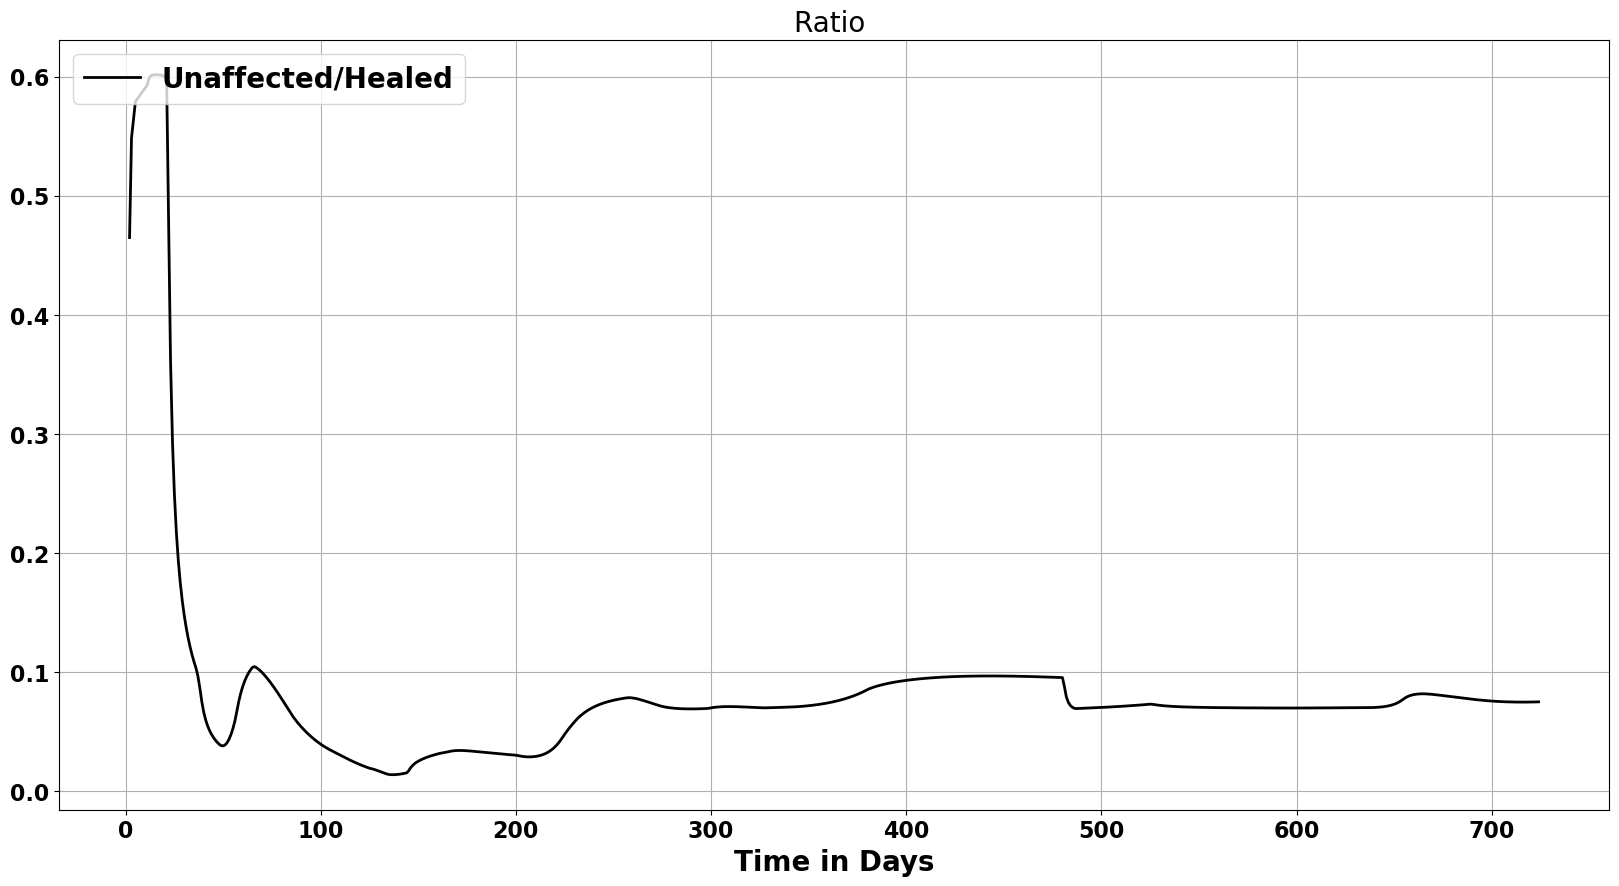

In [29]:

fig = plt.figure()
ax = plt.subplot(111)
#t = np.linspace(0, 67, 67)
plt.plot(data_time ,U/H,'black', label='Unaffected/Healed',linewidth=2)

# plotting t, c separately 
#plt.plo
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Ratio ',fontsize=20)
plt.xlabel("Time in Days",fontsize=20)
ax.legend(loc=2, prop={'size': 20})

#plt.yscale("log")
plt.grid()
#plt.show()
##plt.savefig("Unaffected_Healed_ratios.pdf")
#plt.savefig('KenyaCOVID19/R0_Unaffected_Healed_ratios.png', dpi = 300, bbox_inches='tight')


In [30]:
"""fitting the SIDARTHE Model to the data"""
alpha1=[]
beta1=[]
delta1=[]
gamma1=[]
epsilon1=[]
zeta1=[]
lamda1=[]
eta1=[]
rho1=[]
theta1=[]
mu1=[]
kappa1=[]
nu1=[]
chi1=[]
sigma1=[]
tau1=[]
for i in range(len(data_time)):
    alpha1.append(par1[i][0])
    beta1.append(par1[i][1])
    delta1.append(par1[i][2])
    gamma1.append(par1[i][3])
    epsilon1.append(par1[i][4])
    zeta1.append(par1[i][5])
    lamda1.append(par1[i][6])
    eta1.append(par1[i][7])
    rho1.append(par1[i][8])
    theta1.append(par1[i][9])
    mu1.append(par1[i][10])
    kappa1.append(par1[i][11])
    nu1.append(par1[i][12])
    chi1.append(par1[i][13])
    sigma1.append(par1[i][14])
    tau1.append(par1[i][15])




alpha2=np.array(alpha1)
beta2=np.array(beta1)
delta2=np.array(delta1)
gamma2=np.array(gamma1)
epsilon2=np.array(epsilon1)
zeta2=np.array(zeta1)
lamda2=np.array(lamda1)
eta2=np.array(eta1)
rho2=np.array(rho1)
theta2=np.array(theta1)
mu2=np.array(mu1)
kappa2=np.array(kappa1)
nu2=np.array(nu1)
chi2=np.array(chi1)
sigma2=np.array(sigma1)
tau2=np.array(tau1)

plt.rcParams["font.weight"] #= \"bold\"
plt.rcParams["axes.labelweight"] #= \"bold\"
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
# Plotting The reproduction number


/usr/lib/python3/dist-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  ret

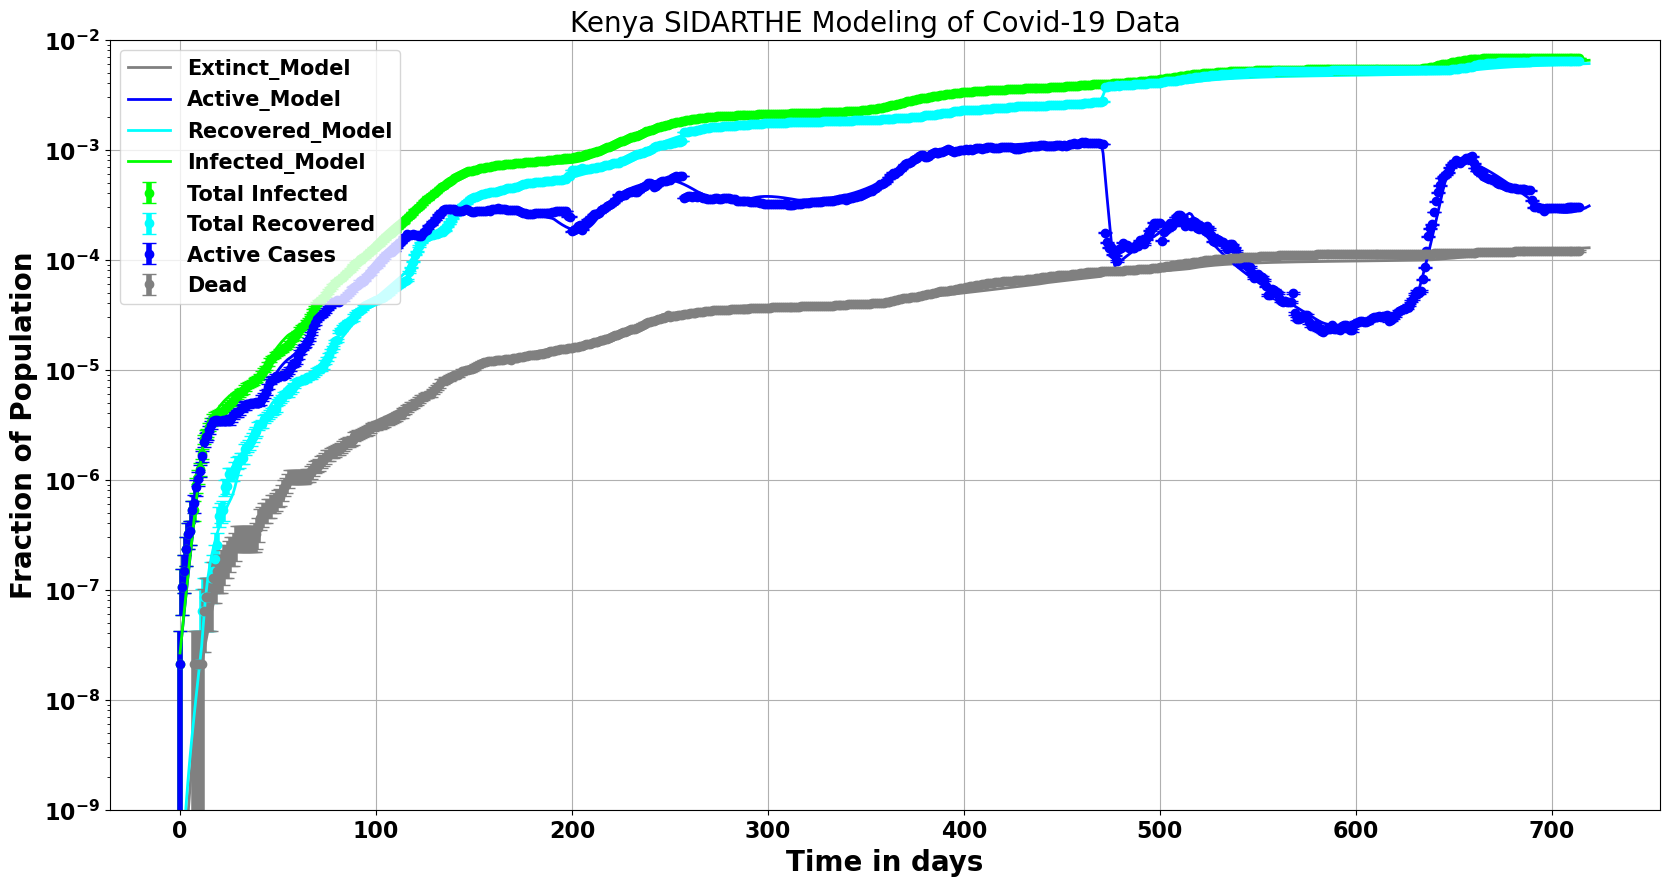

In [31]:
"""Fitting SIRDATHE based on Toivo's plots"""
fig = plt.figure()
ax = plt.subplot(111)
plt.errorbar(t, Dinfected,yerr=error_infected, fmt='o', color='lime',label='Total Infected', elinewidth=4,capsize=5)
plt.errorbar(t, Drecovered,yerr=error_recovered, fmt='o', color='aqua',label='Total Recovered', elinewidth=4,capsize=5) # plotting t, c separately 
plt.errorbar(t, Dactive,yerr=error_active,fmt='o', color='blue',label='Active Cases', elinewidth=4,capsize=5) # plotting t, c separately
plt.errorbar(t, Ddead, yerr=error_dead, fmt='o', color='grey',label='Dead', elinewidth=4,capsize=5)

plt.plot(t, E,'grey',label='Extinct_Model',linewidth=2) # plotting t, c separately
plt.plot(t, actif_sidarthe,'blue',label='Active_Model',linewidth=2) # plotting t, c separately
plt.plot(t, H,'aqua',label='Recovered_Model',linewidth=2) # plotting t, b 2eparately 
plt.plot(t, total_sidarthe, 'lime', label='Infected_Model', linewidth=2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Time in days",fontsize=20)
plt.ylabel("Fraction of Population",fontsize=20)
plt.title('Kenya SIDARTHE Modeling of Covid-19 Data  ',fontsize=20)
plt.legend()
ax.legend(loc=2, prop={'size': 15})
plt.yscale('log')
plt.ylim(10**-9, 10**-2)
plt.grid(True)
#plt.show()
##fig.savefig('kenya_SIDARTHE_model_fitting.pdf')
#plt.savefig('KenyaCOVID19/Kenya_SIDARTHE_MODEL_FITTING_logscale.png', dpi = 300, bbox_inches='tight')




TypeError: LogScale.__init__() got an unexpected keyword argument 'nonposy'

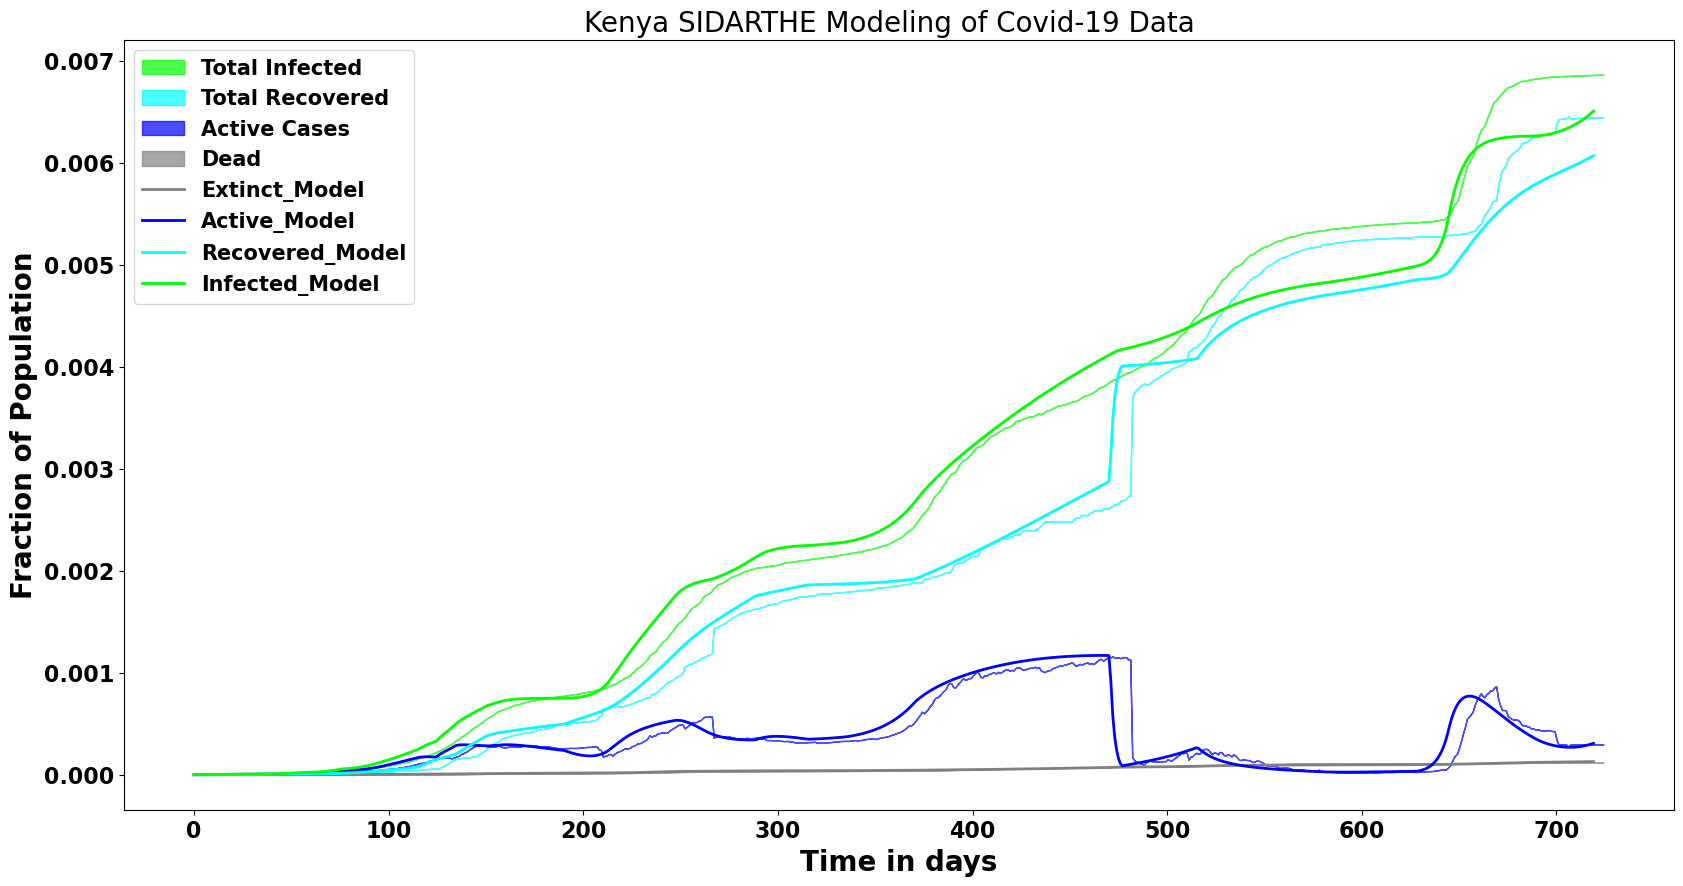

In [32]:
#plt.fill_between(data_time ,Dinfecteds-error_infectedf,Dinfecteds+error_infectedf,color='g',alpha=alpha,label='Confirmed Cases (Data)')


fig = plt.figure()
ax = plt.subplot(111)
alpha=0.7

#plt.errorbar(data_time ,Dinfecteds,yerr=error_infectedf,fmt='o',color='g',label='Infected',elinewidth=4,capsize=5)
#plt.fill_between(data_time ,Dinfecteds-error_infectedf,Dinfecteds+error_infectedf,color='g',alpha=alpha,label='Confirmed Cases (Data)')
#plt.fill_between(data_time ,Dactifs-error_actif,Dactifs+error_actif,color='b',alpha=alpha,label='Active Cases (Data)')
#plt.fill_between(data_time ,Drecovereds-error_recovered,Drecovereds+error_recovered,color='c',alpha=alpha,label='Healed (Data)')
#plt.fill_between(data_time ,Ddeads-error_dead,Ddeads+error_dead,color='gray',alpha=alpha,label='Extinct (Data)')


plt.fill_between(data_time, Dinfected-error_infected,Dinfected-error_infected, color='lime',alpha=alpha,label='Total Infected')
#plt.fill_between(data_time ,Dinfecteds-error_infectedf,Dinfecteds+error_infectedf,color='g',alpha=alpha,label='Confirmed Cases (Data)')
plt.fill_between(data_time, Drecovered-error_recovered,Drecovered-error_recovered, color='aqua',alpha=alpha,label='Total Recovered') # plotting t, c separately 
plt.fill_between(data_time, Dactive-error_active,Dactive-error_active, color='blue',alpha=alpha,label='Active Cases') # plotting t, c separately
plt.fill_between(data_time, Ddead-error_dead,Ddead-error_dead, color='grey',alpha=alpha,label='Dead')


plt.plot(t, E,'grey',label='Extinct_Model',linewidth=2) # plotting t, c separately
plt.plot(t, actif_sidarthe,'blue',label='Active_Model',linewidth=2) # plotting t, c separately
plt.plot(t, H,'aqua',label='Recovered_Model',linewidth=2) # plotting t, b 2eparately 
plt.plot(t, total_sidarthe, 'lime', label='Infected_Model', linewidth=2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Time in days",fontsize=20)
plt.ylabel("Fraction of Population",fontsize=20)
plt.title('Kenya SIDARTHE Modeling of Covid-19 Data  ',fontsize=20)
plt.legend()
ax.legend(loc=2, prop={'size': 15})
plt.yscale('log', nonposy='clip')
plt.ylim(10**-9, 10**-2)
plt.grid(True)
#plt.show()
##fig.savefig('kenya_SIDARTHE_model_fitting.pdf')
#plt.savefig('KenyaCOVID19/Kenya_SIDARTHE_MODEL_FITTING_logscale.png', dpi = 300, bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(15,15))
gs=gridspec.GridSpec(2,1, height_ratios=[2,1])
ax0=plt.subplot(gs[0])
ax0.set_yscale('log')

plt.errorbar(t, Dinfected,yerr=error_infected, fmt='o', color='lime',label='Total cases (Data)', elinewidth=4,capsize=5)
plt.errorbar(t, Drecovered,yerr=error_recovered, fmt='o', color='aqua',label='Healed (Data)', elinewidth=4,capsize=5) # plotting t, c separately 
plt.errorbar(t, Dactive,yerr=error_active,fmt='o', color='blue',label='Active Cases (Data)', elinewidth=4,capsize=5) # plotting t, c separately
plt.errorbar(t, Ddead, yerr=error_dead, fmt='o', color='grey',label='Healed (Data)', elinewidth=4,capsize=5)
plt.plot(t, E,'grey',label='Extinct (Model)',linewidth=2) # plotting t, c separately
plt.plot(t, actif_sidarthe,'blue',label='Active cases (Model)',linewidth=2) # plotting t, c separately
plt.plot(t, H,'aqua',label='Healed (Model)',linewidth=2) # plotting t, b 2eparately 
plt.plot(t,total_sidarthe , 'lime', label='Total cases (Model)', linewidth=2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Time in days",fontsize=20)
plt.ylabel("Fraction of Population",fontsize=20)
plt.title('Kenya SIDARTHE Modeling of Covid-19 Data  ',fontsize=20)
plt.legend()
ax.legend(loc=2, prop={'size': 15})
plt.yscale('log')
plt.ylim(1.5*10**-8, 10**-2)

#plt.ylim(0, 2*10**-4)
plt.legend(loc='upper left',prop={'size':14})
plt.legend(frameon=False, fontsize=15)
plt.savefig("Modeling of Covid-19, Kenya", dpi=300, bbox_inches='tight')



ax1=plt.subplot(gs[1], sharex=ax0)



alpha=0.7
# Plotting The reproduction number
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

#t = np.linspace(0, 67, 67)

plt.plot(t,R0,'black', label='Basic reproduction number ($R_{0}$)',linewidth=4) # plotting t, c separately 
plt.fill_between(t ,R0-DR0,R0+DR0,color='r',alpha=alpha,label='Total uncertainty')


plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.title('Basic Reproduction Number (R0)_Cameroon ',fontsize=20)
plt.xlabel("Time (days)",fontsize=20)
plt.ylabel("$R_0$",fontsize=20)
plt.legend(loc='upper right',prop={'size':14})
#plt.xscale("log")
#plt.yscale("log")
#plt.grid(True)
plt.subplots_adjust(hspace=.0)
#plt.xlim(-10,400)
plt.legend(frameon=False, fontsize=15)
plt.savefig("Modeling of Covid-19, Kenya Data with R0", dpi=300, bbox_inches='tight')

print(len(total_sidarthe))
print(len(Drecovered))

In [ ]:
infect=((np.sqrt((data_infected)))/N)
dea=((np.sqrt((data_dead)))/N)
act=((np.sqrt((data_active)))/N)
recov=((np.sqrt((data_recovered)))/N)
vaccine=((np.sqrt((dados['Fully_Vaccinated'])))/N)


uncert_infectedf=np.divide(infect, total_sidarthe)
uncert_actif=np.divide(act, actif_sidarthe)
uncert_dead=np.divide(dea, E)
uncert_recovered=np.divide(recov, H)
uncert_vaccine=np.divide(vaccine, V)

In [ ]:
fig = plt.figure(figsize=(15,10))
alpha=0.7
plt.subplot(111)


out5=np.divide(dados['Fration_Fully_Vaccinated'], V)
#print('\nOutput arry: \n',out)

#plt.plot(data_time,Goodness,'y')
#plt.plot(data_time,out5, 'y',label='Data/Model(Totaly Vaccineted)',linewidth=4)
#plt.fill_between(data_time ,out5-uncert_vaccine,out5+uncert_vaccine,color='y',alpha=alpha)
#plt.fill_between(t5 ,out5[t5]-uncert_dosage[t5],out5[t5]+uncert_dosage[t5],color='y',alpha=alpha)
#plt.errorbar(data_time ,out,yerr=uncert_dosage,fmt='o', color='g',label='Dead',elinewidth=4,capsize=10)

plt.plot(data_time,Goodness,'black',linewidth=4,label='Goodness-of-fit reference line')
#plt.fill_between(data_time ,out5-uncert_vaccine,out5+uncert_vaccine,color='y',alpha=alpha)
plt.errorbar(data_time,out5,yerr=uncert_vaccine,fmt='o', color='y',label=' Goodness of fit for fully vaccinated persons',elinewidth=4,capsize=5)
#plt.scatter(data_time,out5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Time (days)",fontsize=16)
plt.ylabel("Data/Model ",fontsize=16)
plt.title('Data / Model (fully vaccinated persons)',fontsize=20)
plt.legend()
#plt.grid(True)
plt.ylim(0,2)
plt.xlim(484,750) 



plt.savefig("GoodnessKEN", dpi=300, bbox_inches='tight')




In [ ]:
fig = plt.figure(figsize=(15,10))

alpha=0.7
"""Goodness of Fit Plotting"""
plt.subplot(221)

out=np.divide(Dinfected, total_sidarthe)
#print('\nOutput arry: \n',out)
plt.plot(t, out, 'lime',label='Total Infected/Infected_Model',linewidth=2)
plt.plot(t, Goodness, 'lime', label='Goodness-of-fit', linewidth=4)
error = np.divide(error_infected,total_sidarthe) 
plt.fill_between(t, out+error, out-error, alpha=0.2, edgecolor='lime', facecolor='#089FFF',
    linewidth=10, antialiased=True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.xlabel("time (days)",fontsize=20)
plt.ylabel("Total Infected/Infected_Model",fontsize=15)
plt.title('Goodness of Fit for Total Infected ',fontsize=15)
plt.legend()
plt.grid(True)
plt.ylim(0,2)


plt.subplot(222)
out3=np.divide(Drecovered, H)
yerr3 = np.divide(error_recovered, H)
plt.plot(t, out3, 'aqua',label='Recovered/Recovered_Model',linewidth=2)
plt.plot(t, Goodness, 'aqua',label='Goodness-of-fit',linewidth=4)
plt.fill_between(t, out3+yerr3, out3-yerr3, alpha=0.2, edgecolor='aqua', facecolor='#089FFF',
    linewidth=10, antialiased=True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel("Recovered/Recovered_Model",fontsize=15)
plt.title('Goodness of Fit for Total Recovered ',fontsize=15)
plt.legend()
plt.grid(True)
plt.ylim(0,2)



plt.subplot(223)
out1=np.divide(Dactive, actif_sidarthe)
yerr1 = np.divide(error_active, actif_sidarthe)
plt.plot(t, out1, 'blue',label='Active/Active_Model',linewidth=2)
plt.plot(t, Goodness,'blue',label='Goodness-of-fit',linewidth=4)
plt.fill_between(t, out1+yerr1, out1-yerr1, alpha=0.2, edgecolor='blue', facecolor='#089FFF',
    linewidth=10, antialiased=True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.xlabel("time (days)",fontsize=20)
plt.ylabel("Active/Active_Model",fontsize=15)
plt.xlabel("Time (days)",fontsize=20)
plt.title('Goodness of Fit for Active Cases ', fontsize=15)
plt.legend()
plt.grid(True)
plt.ylim(0,2)



plt.subplot(224)
out2=np.divide(Ddead, E)
yerr2 = np.divide(error_dead, E)
plt.plot(t, out2, 'grey',label='Dead/Dead_Model',linewidth=2)
plt.plot(t, Goodness, 'grey',label='Goodness-of-fit',linewidth=4)
plt.fill_between(t, out2+yerr2, out2-yerr2, alpha=0.2, edgecolor='grey', facecolor='#089FFF',
    linewidth=10, antialiased=True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Time (days)",fontsize=20)
plt.ylabel('Dead/Dead_Model',fontsize=15)
plt.title('Goodness of Fit for Dead Cases',fontsize=15)
plt.legend()
plt.grid(True)
plt.ylim(0,2)
##plt.savefig("Kenya_Goodness of Fit.pdf")
#plt.savefig('KenyaCOVID19/Kenya_GoodnessofFit.png', dpi = 300, bbox_inches='tight')






plt.savefig("Goodness of fitting' (R0)_Moz", dpi=300, bbox_inches='tight')


In [ ]:

fig,ax=plt.subplots(2, 2, sharex=True, sharey=True, figsize=(15,10))
alpha=0.7

ax[0,0].plot(data_time,out,'g',label='Confirmed Cases')
ax[0,0].plot(data_time,Goodness,'black')
ax[0,0].fill_between(data_time ,out-uncert_infectedf,out+uncert_infectedf,color='g',alpha=alpha)
ax[0,0].legend(loc=1)
ax[0,0].legend(frameon=False,fontsize=15)
ax[0,0].tick_params(labelsize=15)
#ax[0,0].plot.xticks(fontsize=16)
#ax[0,0].plt.yticks(fontsize=16)
#ax[0,0].set_ylabel("Data/Model",fontsize=15)
#ax[0,0].plt.legend()


ax[0,1].plot(data_time,out1, 'b',label='Active Cases',linewidth=2)
ax[0,1].plot(data_time,Goodness,'black')
ax[0,1].fill_between(data_time ,out1-uncert_actif,out1+uncert_actif,color='b',alpha=alpha)
ax[0,1].legend(loc=1)
ax[0,1].legend(frameon=False,fontsize=15)
ax[0,1].tick_params(labelsize=15)

ax[1,0].plot(data_time,out2, 'gray',label='Extinct',linewidth=2)
ax[1,0].plot(data_time,Goodness, 'black')
ax[1,0].fill_between(data_time ,out2-uncert_dead,out2+uncert_dead,color='gray',alpha=alpha)
ax[1,0].legend(loc=1)
ax[1,0].legend(frameon=False,fontsize=15)
ax[1,0].tick_params(labelsize=15)
#ax[1,0].set_ylabel("Data/Model",fontsize=15)
#ax[1,0].set_xlabel("Time (days)",fontsize=15)

ax[1,1].plot(data_time,out3, 'c', label='Healed',linewidth=2)
ax[1,1].plot(data_time,Goodness, 'black')
ax[1,1].fill_between(data_time ,out3-uncert_recovered,out3+uncert_recovered,color='c',alpha=alpha)
ax[1,1].legend(loc=1)
ax[1,1].legend(frameon=False,fontsize=15)
ax[1,1].tick_params(labelsize=15)
#ax[1,1].set_xlabel("Time (days)",fontsize=15)
plt.ylim(0,1.95)
plt.xlim(-30,400)
plt.subplots_adjust(wspace=.0, hspace=.0)
fig.text(0.05, 0.4, "Data/Model", rotation='vertical',fontsize=20)
fig.text(0.45, 0.05, "Time (days)", rotation='horizontal',fontsize=20)

plt.savefig("Goodness of fitting' (R0)_Kenya1", dpi=300, bbox_inches='tight')





In [ ]:
"""Fitting SIDARTHE: linear scale Plot"""
fig = plt.figure()
plt.errorbar(t, Dinfected,yerr=error_infected, fmt='o', color='lime',label='Total Infected', elinewidth=4,capsize=5)
plt.errorbar(t, Drecovered,yerr=error_recovered, fmt='o', color='aqua',label='Total Recovered', elinewidth=4,capsize=5) # plotting t, c separately 
plt.errorbar(t, Dactive,yerr=error_active,fmt='o', color='blue',label='Active Cases', elinewidth=4,capsize=5) # plotting t, c separately
plt.errorbar(t, Ddead, yerr=error_dead, fmt='o', color='grey',label='Dead', elinewidth=4,capsize=5)
plt.plot(t, E,'grey',label='Extinct_Model',linewidth=2) # plotting t, c separately
plt.plot(t, actif_sidarthe,'blue',label='Active_Model',linewidth=2) # plotting t, c separately
plt.plot(t, H,'aqua',label='Recovered_Model',linewidth=2) # plotting t, b 2eparately 
plt.plot(t, total_sidarthe, 'lime', label='Infected_Model', linewidth=2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Time in days",fontsize=20)
plt.ylabel("Fraction of Population",fontsize=20)
plt.title('Kenya SIRDATHE Modeling of COVID-19 Data ',fontsize=20)
plt.legend()
ax.legend(loc=2, prop={'size': 15})
#plt.yscale('log')
#plt.ylim(10**-8, 10**-3)
plt.grid(True)
plt.ylim(0, 3*10**-3)
##plt.show()

#plt.savefig('KenyaCOVID19/Kenya_SIDARTHE_MODEL_FITTING_linear.png', dpi = 300, bbox_inches='tight')



In [ ]:


"""Goodness of Fit Plotting"""
plt.subplot(221)

out=np.divide(Dinfected, total_sidarthe)
#print('\nOutput arry: \n',out)
plt.plot(t, out, 'lime',label='Total Infected/Infected_Model',linewidth=2)
plt.plot(t, Goodness, 'lime', label='Goodness-of-fit', linewidth=4)
error = np.divide(error_infected,total_sidarthe) 
plt.fill_between(t, out+error, out-error, alpha=0.2, edgecolor='lime', facecolor='#089FFF',
    linewidth=10, antialiased=True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.xlabel("time (days)",fontsize=20)
plt.ylabel("Total Infected/Infected_Model",fontsize=15)
plt.title('Goodness of Fit for Total Infected ',fontsize=15)
plt.legend()
plt.grid(True)
plt.ylim(0,2)


plt.subplot(222)
out3=np.divide(Drecovered, H)
yerr3 = np.divide(error_recovered, H)
plt.plot(t, out3, 'aqua',label='Recovered/Recovered_Model',linewidth=2)
plt.plot(t, Goodness, 'aqua',label='Goodness-of-fit',linewidth=4)
plt.fill_between(t, out3+yerr3, out3-yerr3, alpha=0.2, edgecolor='aqua', facecolor='#089FFF',
    linewidth=10, antialiased=True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel("Recovered/Recovered_Model",fontsize=15)
plt.title('Goodness of Fit for Total Recovered ',fontsize=15)
plt.legend()
plt.grid(True)
plt.ylim(0,2)



plt.subplot(223)
out1=np.divide(Dactive, actif_sidarthe)
yerr1 = np.divide(error_active, actif_sidarthe)
plt.plot(t, out1, 'blue',label='Active/Active_Model',linewidth=2)
plt.plot(t, Goodness,'blue',label='Goodness-of-fit',linewidth=4)
plt.fill_between(t, out1+yerr1, out1-yerr1, alpha=0.2, edgecolor='blue', facecolor='#089FFF',
    linewidth=10, antialiased=True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.xlabel("time (days)",fontsize=20)
plt.ylabel("Active/Active_Model",fontsize=15)
plt.xlabel("Time (days)",fontsize=20)
plt.title('Goodness of Fit for Active Cases ', fontsize=15)
plt.legend()
plt.grid(True)
plt.ylim(0,2)



plt.subplot(224)
out2=np.divide(Ddead, E)
yerr2 = np.divide(error_dead, E)
plt.plot(t, out2, 'grey',label='Dead/Dead_Model',linewidth=2)
plt.plot(t, Goodness, 'grey',label='Goodness-of-fit',linewidth=4)
plt.fill_between(t, out2+yerr2, out2-yerr2, alpha=0.2, edgecolor='grey', facecolor='#089FFF',
    linewidth=10, antialiased=True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Time (days)",fontsize=20)
plt.ylabel('Dead/Dead_Model',fontsize=15)
plt.title('Goodness of Fit for Dead Cases',fontsize=15)
plt.legend()
plt.grid(True)
plt.ylim(0,2)
##plt.savefig("Kenya_Goodness of Fit.pdf")
#plt.savefig('KenyaCOVID19/Kenya_GoodnessofFit.png', dpi = 300, bbox_inches='tight')










In [ ]:
'''
fig = plt.figure(figsize=(15,15))
gs=gridspec.GridSpec(2,1, height_ratios=[2,1])
ax0=plt.subplot(gs[0])
ax0.set_yscale('log')

alpha=0.7
#plt.errorbar(data_time ,Dinfecteds,yerr=error_infectedf,fmt='o',color='g',label='Infected',elinewidth=4,capsize=5)
#plt.fill_between(data_time ,Dinfected-error_infected,Dinfected+error_infected,color='g',alpha=alpha,label='Confirmed Cases (Data)')
#plt.fill_between(data_time ,Dactive-error_actif,Dactive+error_active,color='b',alpha=alpha,label='Active Cases (Data)')
#plt.fill_between(data_time ,Drecoveredse-error_recovered,Drecovered+error_recovered,color='c',alpha=alpha,label='Healed (Data)')
#plt.fill_between(data_time ,Ddead-error_dead,Ddead+error_dead,color='gray',alpha=alpha,label='Extinct (Data)')


plt.plot(t, E,'gray',label='Extinct (Model)',linewidth=4) # plotting t, c separately 
plt.plot(t, actif_sidarthe,'b',label='Active Cases (Model)',linewidth=4) # plotting t, c separately 
plt.plot(t, H,'c',label='Healed (Model)',linewidth=4) # plotting t, b separately
plt.plot(t, Infected_sidarthe, 'g',label='Total Cases (Model)',linewidth=4)


plt.xticks(fontsize=0)
plt.yticks(fontsize=16)
#plt.xlabel("Time in days",fontsize=20)
plt.ylabel("Fractions of Population",fontsize=20)

plt.title('Modeling of COVID-19 (Kenya ) ',fontsize=20)
plt.legend()
ax.legend(loc=2, prop={'size': 17})


plt.yscale('log')
plt.ylim(4*10**-8, 2*10**-2)
#plt.grid(True)
#plt.ylim(0, 2*10**-4)
plt.legend(loc='upper left',prop={'size':14})
plt.savefig("Modeling of Covid-19,Kenya", dpi=300, bbox_inches='tight')
plt.legend(frameon=False, fontsize=15)


ax1=plt.subplot(gs[1], sharex=ax0)



alpha=0.7
# Plotting The reproduction number
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

#t = np.linspace(0, 67, 67)

plt.plot(t,R0,'r', label='Basic reproduction number ($R_{0}$)',linewidth=4) # plotting t, c separately 
plt.fill_between(t ,R0-DR0,R0+DR0,color='r',alpha=alpha,label='Total uncertainty')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.title('Basic Reproduction Number (R0)_Cameroon ',fontsize=20)
plt.xlabel("Time (days)",fontsize=20)
plt.ylabel("$R_0$",fontsize=20)
plt.legend(loc='upper right',prop={'size':14})
#plt.xscale("log")
#plt.yscale("log")
#plt.grid(True)
plt.subplots_adjust(hspace=.0)
plt.legend(frameon=False, fontsize=15)
plt.savefig("Modeling of Covid-19, Kenya Data", dpi=300, bbox_inches='tight')

''''

In [ ]:
Dinfected=[]
Drecovered=[]
Dactive=[]
Ddead=[]
for i in data_active:
    Dactive.append(i/N)
for i in data_infected:
    Dinfected.append(i/N)
for i in data_dead:
    Ddead.append(i/N) 
for i in data_recovered:
    Drecovered.append(i/N)
#print(Dactifs)
#print(Ddeads)
#print(Dinfecteds)
#print(Drecovereds)
#To see how to plot with error bars, go here: https://www.youtube.com/watch?v=xhizVO9SPjU
error_dead=[]
error_active=[]
error_recovered=[]
error_infected =[]
for i in range(len(Ddead)):
        error_dead.append(math.sqrt(data_dead[i])/N)
for i in range(len(Dactive)):        
        error_active.append(math.sqrt(data_active[i])/N)
for i in range(len(Drecovered)):
        error_recovered.append(math.sqrt(data_recovered[i])/N)
for i in range(len(Dinfected)):
        error_infected.append(math.sqrt(data_infected[i])/N)
        

In [ ]:
Dactive=[]
Ddead=[]
Drecovered=[]
Dinfected=[]

for i in data_active:
    Dactive.append(i/N)    
for i in data_infected:
    Dinfected.append(i/N)    
for i in data_dead:
    Ddead.append(i/N) 
for i in data_recovered:
    Drecovered.append(i/N)


error_infected=((np.sqrt((data_infected)))/N)
error_dead=((np.sqrt((data_dead)))/N)
error_active=((np.sqrt((data_active)))/N)
error_recovered=((np.sqrt((data_recovered)))/N)
#print(len(data_time))
#print(len(data_infected))
#print(len(data_infected-error_infected))